## Roadmap penelitian

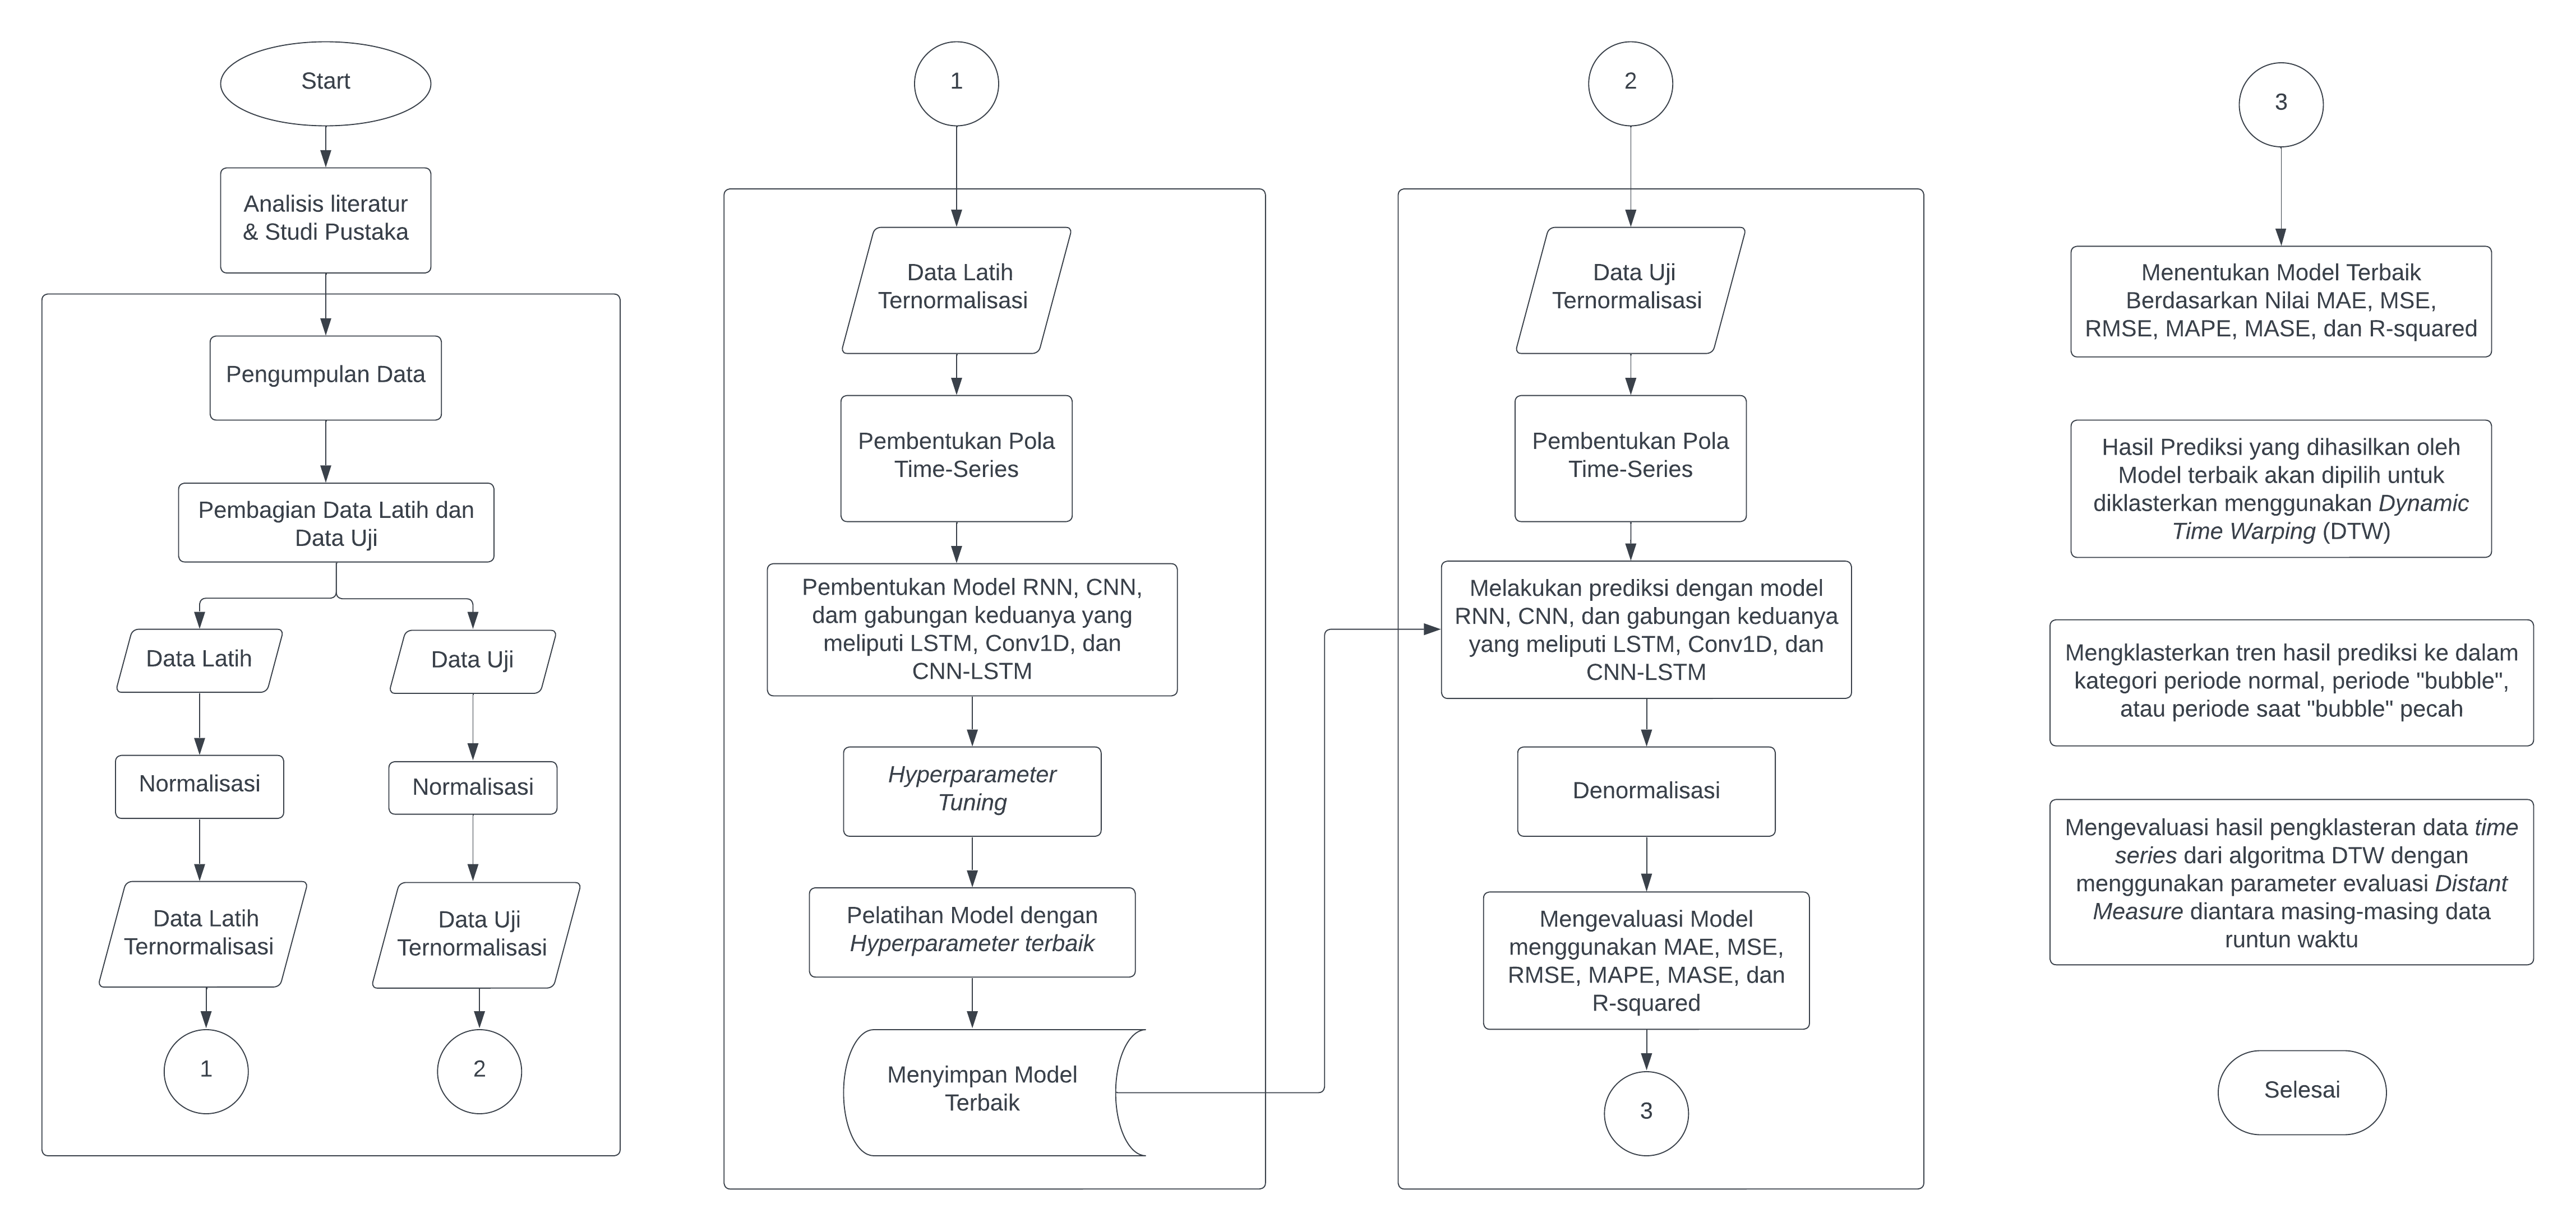

# Konek Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get Data

Sumber data: https://indexes.nikkei.co.jp/en/nkave/archives/data?list=daily


mendownload data harga saham Nikkei225 dengan interval harian dari tahun 1968 sampai 2023

In [ ]:
!wget https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv


--2024-05-29 21:52:54--  https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 886390 (866K) [text/plain]
Saving to: ‘Nikkei225_daily.csv’

Nikkei225_daily.csv 100%[===================>] 865.62K  4.95MB/s    in 0.2s    

2024-05-29 21:52:55 (4.95 MB/s) - ‘Nikkei225_daily.csv’ saved [886390/886390]



# Import data time series dengan pandas

In [ ]:
# import dengan pandas
import pandas as pd

# konversi format nilai
def convert_value(value):
    # Check if the value is not NaN and not '-'
    if value != '-':
        # Remove commas and convert to float
        return float(value.replace(',', ''))
    else:
        return None

# membaca data saham Nikkei225
nikkei225_df = pd.read_csv("D:\ImamSyabana\TugasAkhir\directForecasting\dataset/Nikkei225_daily.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"],
                           converters = {'Open': convert_value,
                                         'High': convert_value,
                                         'Low': convert_value,
                                         'Close': convert_value})
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

nikkei225_df.tail()

,Open,High,Low,Close
Date,,,,
2024-02-22,38508.07,39156.97,38508.07,39098.68
2024-02-26,39320.64,39388.08,39181.03,39233.71
2024-02-27,39260.78,39426.29,39113.03,39239.52
2024-02-28,39189.22,39283.95,39075.47,39208.03
2024-02-29,38935.53,39250.12,38876.81,39166.19


In [ ]:
nikkei225_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20078 entries, 1950-01-04 to 2024-02-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9685 non-null   float64
 1   High    9685 non-null   float64
 2   Low     9685 non-null   float64
 3   Close   20078 non-null  float64
dtypes: float64(4)
memory usage: 784.3 KB


data saham hanya digunakan saat harga close

In [ ]:
nikkei225_close_df = pd.DataFrame(nikkei225_df["Close"]).rename(columns={"Close": "Closing Price (Yen)"})
nikkei225_close_df.tail()


,Closing Price (Yen)
Date,
2024-02-22,39098.68
2024-02-26,39233.71
2024-02-27,39239.52
2024-02-28,39208.03
2024-02-29,39166.19


Informasi jumlah data

In [ ]:
len(nikkei225_df)

20078

menampilkan missing data

In [ ]:
# List the rows where the 'Close' column is nullC
rows_with_null_close = nikkei225_close_df[nikkei225_close_df['Closing Price (Yen)'].isnull()]
print(rows_with_null_close)

Empty DataFrame
Columns: [Closing Price (Yen)]
Index: []


In [ ]:

nikkei225_close_df.isnull().sum()

Closing Price (Yen)    0
dtype: int64

# Bagian membuat multivariate time series dataset.

selain menggunakan data nikkei225, perdiksi harga saham akan dibantu dengan data discount rate

multivariate time series akan menambahkan fitur lebih banyak dari univariate time series yang hanya satu fitur

import file csv





In [ ]:
!wget https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/discountRate/discountRate.csv

--2024-05-29 21:52:56--  https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/discountRate/discountRate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11737 (11K) [text/plain]
Saving to: ‘discountRate.csv’

discountRate.csv    100%[===================>]  11.46K  --.-KB/s    in 0.002s  

2024-05-29 21:52:56 (5.49 MB/s) - ‘discountRate.csv’ saved [11737/11737]



# Import data time seres tambahan: discount rate

import data discount rate

In [ ]:
# import dengan pandas
import pandas as pd
# membaca data discount rate
discRate_df = pd.read_csv("D:\ImamSyabana\TugasAkhir\directForecasting\dataset\discountRate.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

discRate_df[-3:]

C:\Users\Acer Predator\AppData\Local\Temp\ipykernel_11560\1385230831.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  discRate_df = pd.read_csv("D:\ImamSyabana\TugasAkhir\directForecasting\dataset\discountRate.csv",


,discountRate
Date,
2023-12-01,0.3
2024-01-01,0.3
2024-02-01,0.3


In [ ]:
len(discRate_df)

890

menampilkan missing data

In [ ]:
print(discRate_df.isnull().sum())

discountRate    0
dtype: int64


import data discount rate dengan modul csv.reader

In [ ]:
# import dan format historikal data dengan python

import csv
from datetime import datetime

timesteps_discountRate = []
discountRate_value = []

with open("D:\ImamSyabana\TugasAkhir\directForecasting\dataset\discountRate.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_discountRate.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    discountRate_value.append(float(line[1])) #membaca nilai discount rate


In [ ]:
timesteps_discountRate[:3], discountRate_value[:3]

([datetime.datetime(1950, 1, 1, 0, 0),
  datetime.datetime(1950, 2, 1, 0, 0),
  datetime.datetime(1950, 3, 1, 0, 0)],
 [5.11, 5.11, 5.11])

In [ ]:
len(discountRate_value)

890

In [ ]:
type(timesteps_discountRate), type(discountRate_value)

(list, list)

In [ ]:
len(discountRate_value)

890

# Mengumpulkan data menjadi satu dataframe

In [ ]:
# membuat dataframe untuk mengumpulkan semua data multivariate

# copy dataframe nikkei yang masih hanya berisi harga saham
nikkei225_close_multivariate_df = nikkei225_close_df.copy()

# menambahkan kolom money stock dan dsicount rate

nikkei225_close_multivariate_df["discount_rate"] = None
nikkei225_close_multivariate_df

,Closing Price (Yen),discount_rate
Date,,
1950-01-04,108.56,None
1950-01-05,105.54,None
1950-01-06,102.64,None
1950-01-07,102.95,None
1950-01-09,102.78,None
...,...,...
2024-02-22,39098.68,None
2024-02-26,39233.71,None
2024-02-27,39239.52,None


menggabungkan data discount rate dan money supply ke dataframe Nikkei225 closing price

In [ ]:
for x in range(len(timesteps_discountRate)):
  for y in range(len(nikkei225_close_multivariate_df.index)):
    IntervalBulan_timesteps_atrYEAR = timesteps_discountRate[x].year
    IntervalBulan_timesteps_atrMONTH = timesteps_discountRate[x].month
    IntervalBulan_timesteps_atrDAY = timesteps_discountRate[x].day

    IntervalHarian_timesteps_atrYEAR = nikkei225_close_multivariate_df.index[y].year
    IntervalHarian_timesteps_atrMONTH = nikkei225_close_multivariate_df.index[y].month
    IntervalHarian_timesteps_atrDAY = nikkei225_close_multivariate_df.index[y].day

    if IntervalBulan_timesteps_atrYEAR == IntervalHarian_timesteps_atrYEAR and IntervalBulan_timesteps_atrMONTH == IntervalHarian_timesteps_atrMONTH:
      string_tanggal = "{tahun}-{bulan}-{tanggal}".format(tahun = IntervalHarian_timesteps_atrYEAR, bulan = IntervalHarian_timesteps_atrMONTH, tanggal = IntervalHarian_timesteps_atrDAY)
      date_to_index = pd.to_datetime(string_tanggal)
      nikkei225_close_multivariate_df.loc[date_to_index, "discount_rate"] = discountRate_value[x]

In [ ]:
discRate_df[80:90]

,discountRate
Date,
1956-09-01,7.30
1956-10-01,7.30
1956-11-01,7.30
1956-12-01,7.30
1957-01-01,7.30
1957-02-01,7.30
1957-03-01,7.67
1957-04-01,7.67
1957-05-01,8.40


In [ ]:
nikkei225_close_multivariate_df[11520:11600]

,Closing Price (Yen),discount_rate
Date,,
1989-04-26,33434.93,2.5
1989-04-27,33500.83,2.5
1989-04-28,33713.35,2.5
1989-05-01,33793.17,3.25
1989-05-02,33954.99,3.25
...,...,...
1989-08-14,34671.62,3.25
1989-08-15,34810.69,3.25
1989-08-16,35084.15,3.25


In [ ]:
type(nikkei225_close_multivariate_df.index.tolist())

list

# Visualisasi data : Membuat fungsi untuk visualisasi (plotting)


In [ ]:
# membuat fungsi untuk menggambar data time series

import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format= ".", start = 0, end =None, label = None, color = None):
  """
  Memvisualisasikan timesteps (serangkaian keterangan waktu dengan interval tertentu) terhadap nilainya pada timesteps yang bersesuaian
  Parameters
  -------------
  timesteps : kumpulan timestep
  values : kumpulan nilai (saham dan discount Rate)
  format : style grafik, default "."
  start : timesteps rentang awal yang divisualisasi
  end : timesteps rentang akhir yang divisualisasi
  label : untuk memberi keterangan grafik
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label, color = color)
  plt.xlabel("Tanggal")
  plt.ylabel("Saham Nikkei225 Penutupan (harian)")
  if label:
    plt.legend(fontsize = 14) #make label bigger
  plt.grid(True)


Visualisasi data saham nikkei225

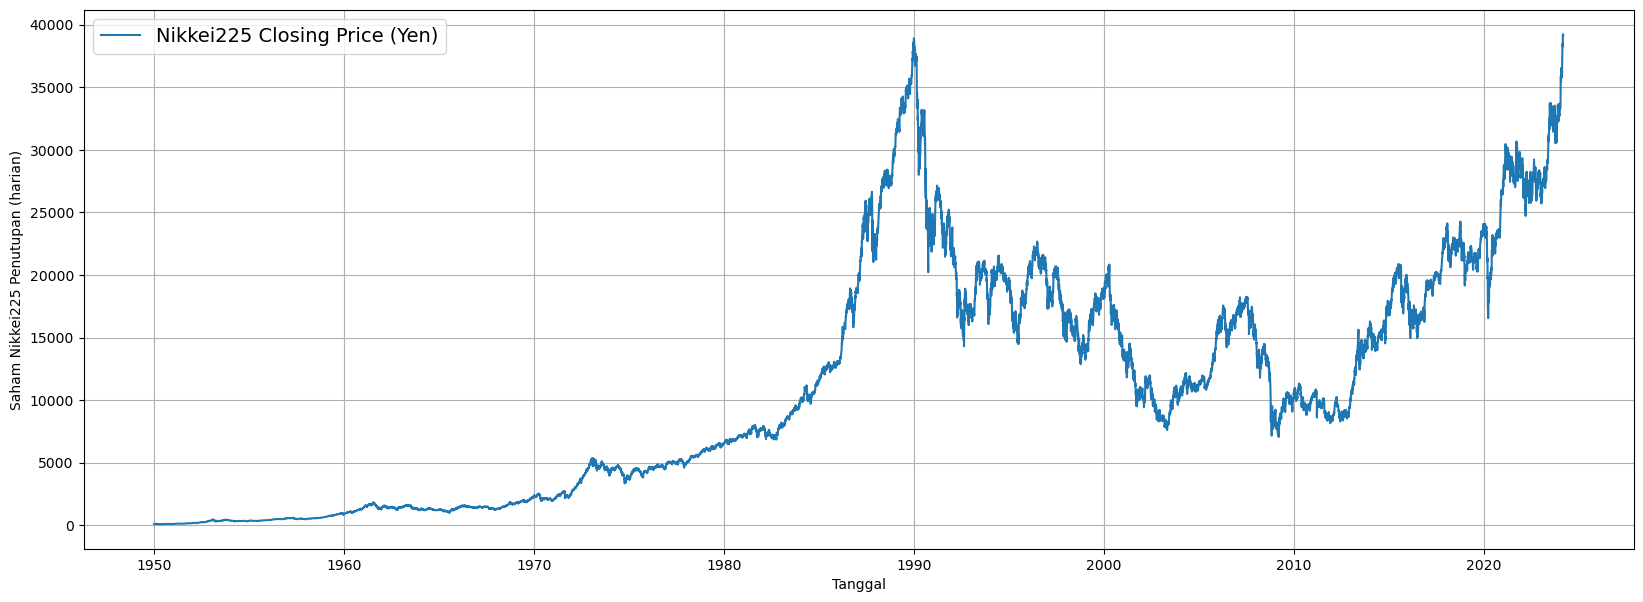

In [ ]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)")


Visualisasi data discount rate

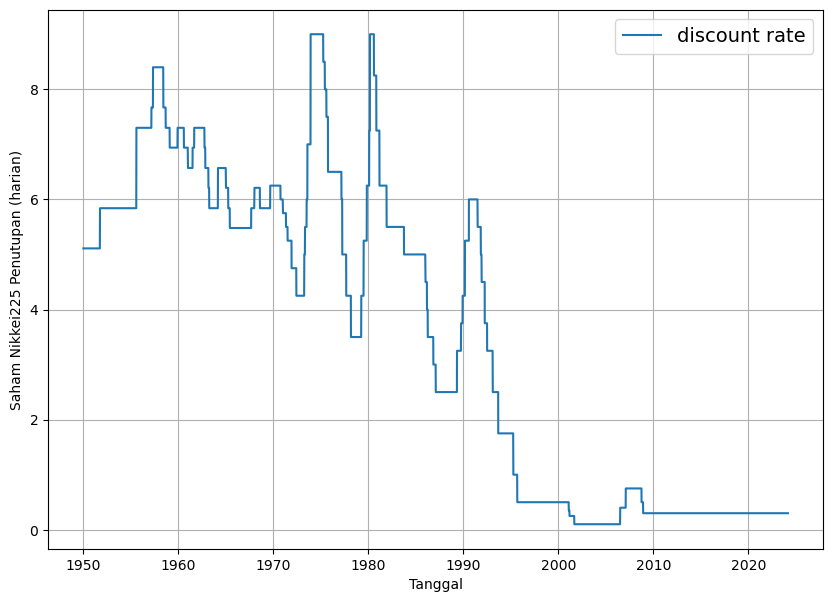

In [ ]:

plt.figure(figsize = (10,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate")


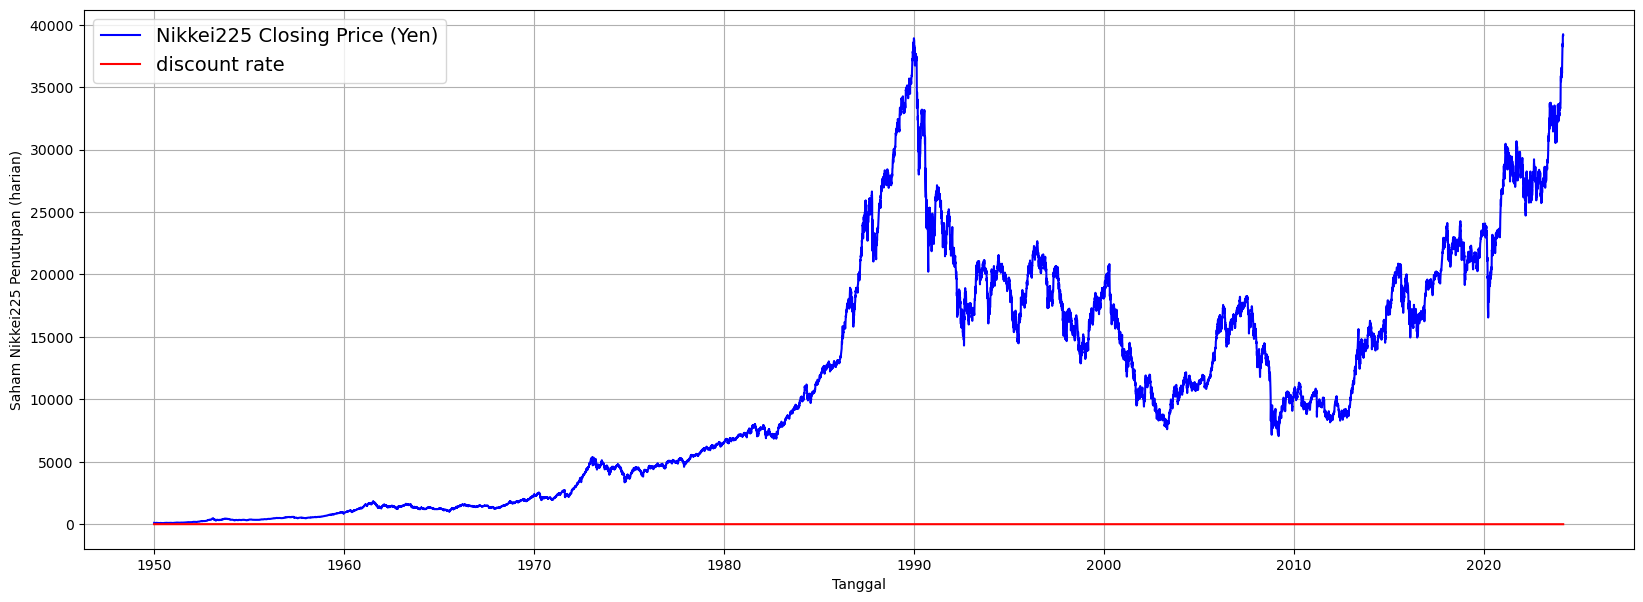

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate", color = 'r')


# Melakukan normalisasi dataset

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# meinputkan data ke MinMaxScaler
scaler_multivariate = MinMaxScaler(feature_range=(0, 1))
scaler_multivariate.fit(nikkei225_close_multivariate_df)

MinMaxScaler()

In [ ]:
scaler_univariate = MinMaxScaler(feature_range = (0,1))

# mengimplementasikan scaler khusus univariate ke data saham nikkei225 saja
scaler_univariate.fit(nikkei225_close_df["Closing Price (Yen)"].values.reshape(-1, 1))

MinMaxScaler()

In [ ]:
# Melakukan normalization
scaler_multivariate.transform(nikkei225_close_multivariate_df)

array([[5.95337367e-04, 5.62921348e-01],
       [5.18206571e-04, 5.62921348e-01],
       [4.44140575e-04, 5.62921348e-01],
       ...,
       [1.00000000e+00, 2.24719101e-02],
       [9.99195745e-01, 2.24719101e-02],
       [9.98127152e-01, 2.24719101e-02]])

membuat dataframe dengan nilai normalized

In [ ]:
normalized_data  = scaler_multivariate.transform(nikkei225_close_multivariate_df)
normalized_data


array([[5.95337367e-04, 5.62921348e-01],
       [5.18206571e-04, 5.62921348e-01],
       [4.44140575e-04, 5.62921348e-01],
       ...,
       [1.00000000e+00, 2.24719101e-02],
       [9.99195745e-01, 2.24719101e-02],
       [9.98127152e-01, 2.24719101e-02]])

In [ ]:
print ("dataset_normalized.shape" , normalized_data.shape)

dataset_normalized.shape (20078, 2)


In [ ]:
normalized_data[:,0].reshape(-1, 1)

array([[5.95337367e-04],
       [5.18206571e-04],
       [4.44140575e-04],
       ...,
       [1.00000000e+00],
       [9.99195745e-01],
       [9.98127152e-01]])

In [ ]:
type(normalized_data[:,0].reshape(-1, 1))

numpy.ndarray

In [ ]:
# konversi array menjadi bentuk dataframe
scaled_nikkei225_close_multivariate_df  = pd.DataFrame(normalized_data, columns=nikkei225_close_multivariate_df.columns)


In [ ]:
scaled_nikkei225_close_multivariate_df

,Closing Price (Yen),discount_rate
0,0.000595,0.562921
1,0.000518,0.562921
2,0.000444,0.562921
3,0.000452,0.562921
4,0.000448,0.562921
...,...,...
20073,0.996403,0.022472
20074,0.999852,0.022472
20075,1.000000,0.022472
20076,0.999196,0.022472


LAtihan denormalisasi

In [ ]:

# # Fit the scaler to your data
# scaler_multivariate = MinMaxScaler()
# scaler_multivariate.fit(nikkei225_close_multivariate_df[['discount_rate']])

# # Perform inverse normalization
# inverse_normalized_data = scaler_multivariate.inverse_transform(scaled_nikkei225_close_multivariate_df[:, 2].reshape(-1, 1))

# print(inverse_normalized_data)

In [ ]:
len(scaler_multivariate.transform(nikkei225_close_multivariate_df ))

20078

In [ ]:
scaler_multivariate.transform(nikkei225_close_multivariate_df )[:,0].reshape(-1, 1)

array([[5.95337367e-04],
       [5.18206571e-04],
       [4.44140575e-04],
       ...,
       [1.00000000e+00],
       [9.99195745e-01],
       [9.98127152e-01]])

Visualisasi data yang di normalisasi

In [ ]:
scaled_nikkei225_close_multivariate_df["discount_rate"]

0        0.562921
1        0.562921
2        0.562921
3        0.562921
4        0.562921
           ...   
20073    0.022472
20074    0.022472
20075    0.022472
20076    0.022472
20077    0.022472
Name: discount_rate, Length: 20078, dtype: float64

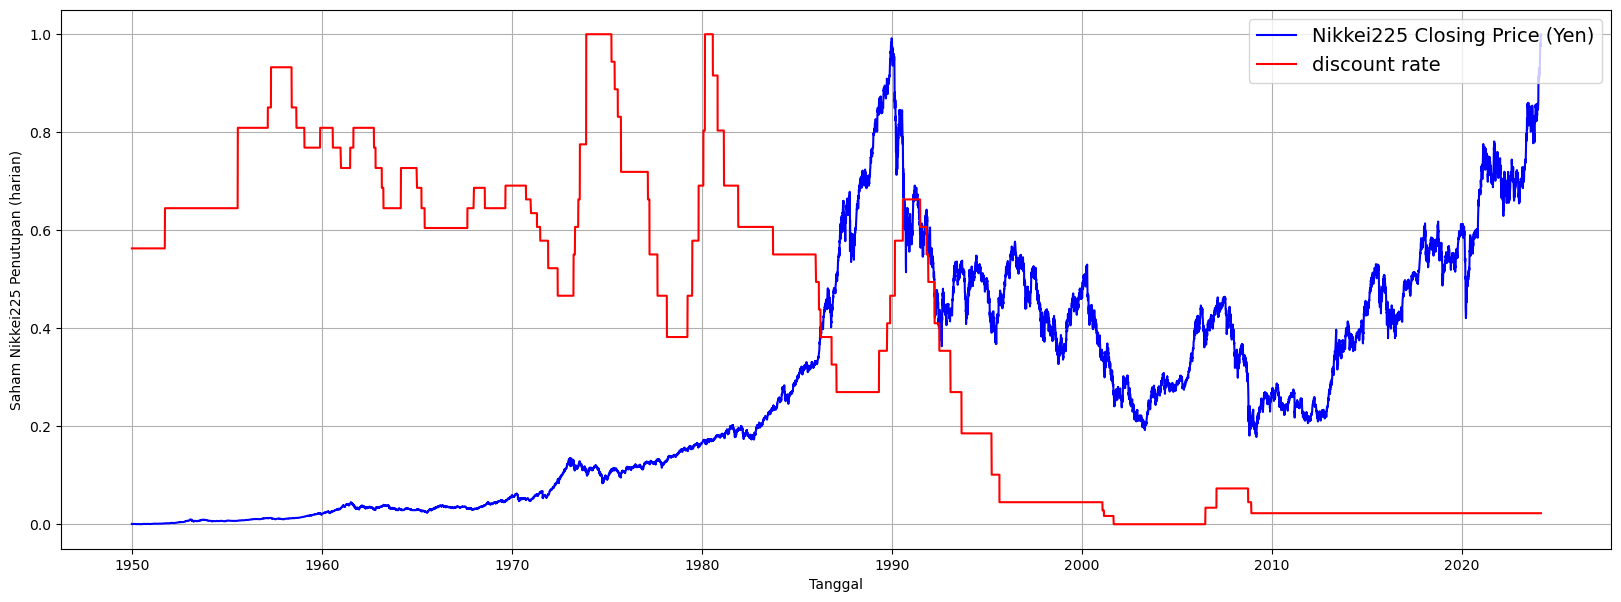

In [ ]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["Closing Price (Yen)"], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["discount_rate"], format = "-", label = "discount rate", color = 'r')


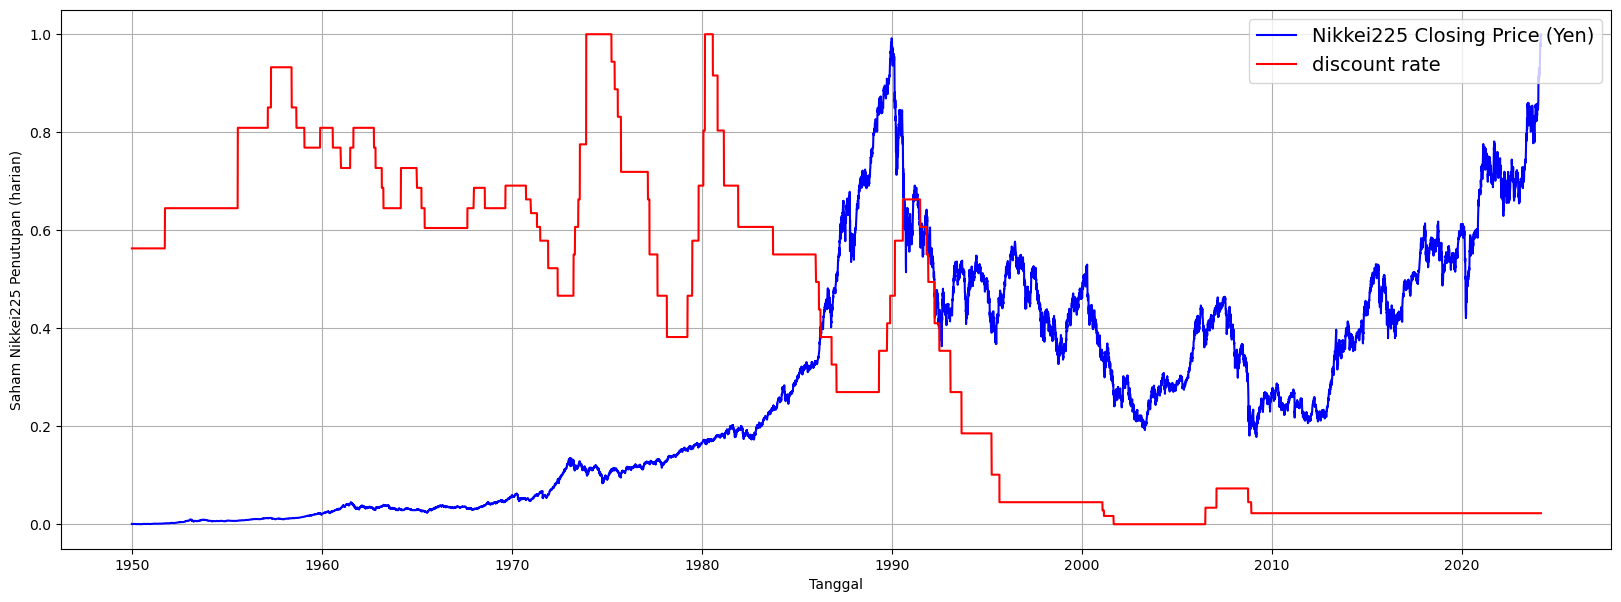

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,1], format = "-", label = "discount rate", color = 'r')



# Membuat dataset multivariate menjadi format sliding window

In [ ]:
# PENGATURAN UNTUK UKURAN INPUT SEQUENCE ATAU LAG ATAU WINDOW

# HORIZON DI ATUR UNTUK MEMILIKI UKUTAN 1 UNTUK MODEL MENGELUARKAN OUTPUT SATU TIMESTEPS SETIAP PREDIKSI
HORIZON = 1
WINDOW_SIZE = 28

# PENGATURAN PRESENTASE DISTRIBUSI DALAM MEMBAGI DATASET KE DALAM TRAIN DAN TEST SET
SPLIT_SIZE = 0.7 # 70% data untuk train test 30% untuk test size

In [ ]:
nikkei225_close_multivariate_df[:2]

,Closing Price (Yen),discount_rate
Date,,
1950-01-04,108.56,5.11
1950-01-05,105.54,5.11


In [ ]:
scaled_nikkei225_close_multivariate_df[:2]

,Closing Price (Yen),discount_rate
0,0.000595,0.562921
1,0.000518,0.562921


membuat window dan horizon multivariate

In [ ]:
len(scaled_nikkei225_close_multivariate_df)

20078

In [ ]:
# fungsi untuk membuat sliding window

import numpy as np

def make_dataset(raw_data, WINDOW_SIZE=7, posisi_HORIZON = 1):
    _X = []
    _y = []

    for i in range(len(raw_data) - WINDOW_SIZE - posisi_HORIZON + 1):
      #jumlah iterasi mengkompromi offset sliding window untuk window dan horizonnya
        _X.append(raw_data[i : i + WINDOW_SIZE])
        _y.append(raw_data[i + WINDOW_SIZE + posisi_HORIZON - 1])
        # indeks yang diacu -y hanya satu karena ukuran horizonnya satu

    return np.array(_X), np.array(_y)

In [ ]:
from sklearn import preprocessing

columns = list(scaled_nikkei225_close_multivariate_df.columns)

# membuat variabel sementara untuk menampung data mentah bentuk normalisasi
Xs = []
for i in range(len(columns)):
    Xs.append((scaled_nikkei225_close_multivariate_df[columns[i]]))
Xs = np.array(Xs)

In [ ]:
Xs

array([[5.95337367e-04, 5.18206571e-04, 4.44140575e-04, ...,
        1.00000000e+00, 9.99195745e-01, 9.98127152e-01],
       [5.62921348e-01, 5.62921348e-01, 5.62921348e-01, ...,
        2.24719101e-02, 2.24719101e-02, 2.24719101e-02]])

In [ ]:
len(Xs[0]), len(Xs[1])

(20078, 20078)

In [ ]:

# memanggil fungsi membuat sliding window sebagai data masukkan model yang memprediksi satu horizon
# yang terletak di 1 - 20 timesteps setelah masing-masing window-nya
kumpulan_windows = {}
kumpulan_horizons = {}

for i in range(20):
  kumpulan_windows[f'x_nikkei_{i + 1}'], kumpulan_horizons[f'y_nikkei_{i + 1}'] = make_dataset(Xs[0], WINDOW_SIZE = WINDOW_SIZE, posisi_HORIZON = i + 1)


In [ ]:
len(kumpulan_horizons["y_nikkei_1"]), len(kumpulan_horizons["y_nikkei_20"])

(20050, 20031)

In [ ]:
len(kumpulan_windows["x_nikkei_1"]), len(kumpulan_windows["x_nikkei_20"])

(20050, 20031)

In [ ]:
scaled_nikkei225_close_multivariate_df[:13]

,Closing Price (Yen),discount_rate
0,0.000595,0.562921
1,0.000518,0.562921
2,0.000444,0.562921
3,0.000452,0.562921
4,0.000448,0.562921
5,0.000411,0.562921
6,0.000360,0.562921
7,0.000312,0.562921
8,0.000250,0.562921
9,0.000297,0.562921


In [ ]:
print(kumpulan_windows["x_nikkei_1"][0])
print(kumpulan_windows["x_nikkei_1"][0].shape)
print("\n")
print(kumpulan_horizons["y_nikkei_1"][0])
print(kumpulan_horizons["y_nikkei_1"][0].shape)

[0.00059534 0.00051821 0.00044414 0.00045206 0.00044772 0.00041145
 0.00036037 0.00031235 0.00025004 0.00029729 0.00027966 0.00025591
 0.00030393 0.00034862 0.00032691 0.00033202 0.00030265 0.00030316
 0.00028758 0.00026051 0.00024518 0.00024442 0.00020151 0.00018619
 0.0001867  0.00027353 0.00027736 0.00031159]
(28,)


0.0004203883765423284
()


In [ ]:
print(kumpulan_windows["x_nikkei_1"][1])
print(kumpulan_windows["x_nikkei_1"][1].shape)
print("\n")
print(kumpulan_horizons["y_nikkei_1"][1])
print(kumpulan_horizons["y_nikkei_1"][1].shape)

[0.00051821 0.00044414 0.00045206 0.00044772 0.00041145 0.00036037
 0.00031235 0.00025004 0.00029729 0.00027966 0.00025591 0.00030393
 0.00034862 0.00032691 0.00033202 0.00030265 0.00030316 0.00028758
 0.00026051 0.00024518 0.00024442 0.00020151 0.00018619 0.0001867
 0.00027353 0.00027736 0.00031159 0.00042039]
(28,)


0.0005059473717681368
()


In [ ]:
print(kumpulan_horizons["y_nikkei_1"][:3])
(kumpulan_horizons["y_nikkei_1"][:3].shape)

[0.00042039 0.00050595 0.00056188]


(3,)

format training atau test data pada **window/fitur** adalah **(jumlah sample, ukuran window, jumlah variable)**

In [ ]:
kumpulan_windows["x_nikkei_1"].shape

(20050, 28)

format training atau test data pada **label** adalah **(jumlah sample, jumlah variabel)** [Hanya memiliki dua dimensi shape jika ingin dengan benar menghasilkan output yang sesuai]

In [ ]:
kumpulan_horizons["y_nikkei_1"].shape

(20050,)

Membagi data menjadi training dataset dan test data set. Pembagian data menjadi train dan test dengan train series split dimana Test dataset akan menggunakan data yang pseusdo future (data yang seakan2 berperan dari masa depan).

In [ ]:
len(kumpulan_windows["x_nikkei_1"][: int(SPLIT_SIZE * len(kumpulan_windows["x_nikkei_1"]))])

14035

In [ ]:
len(kumpulan_windows["x_nikkei_20"][: int(SPLIT_SIZE * len(kumpulan_windows["x_nikkei_20"]))])

14021

In [ ]:
# Membagi full sliding windows menjadi windows untuk train dan test begitu pula
# untuk label untuk semua target timesteps horizon di 1 - 20 timesteps setelah window-nya
kumpulan_train_windows = {}
kumpulan_test_windows = {}
kumpulan_train_horizons = {}
kumpulan_test_horizons = {}

# melakukan iterasi sebanyak 20 kali untuk membagi data format window dan horizon untuk
#  semua target timesteps horizon di 1 - 20 timesteps setelah window-nya
for i, (key, value) in enumerate(kumpulan_windows.items(), start = 1):
  kumpulan_train_windows[f"train_windows_{i}"] = value[:len(value[: int(SPLIT_SIZE * len(value))])]
  kumpulan_test_windows[f"test_windows_{i}"] = value[len(value[: int(SPLIT_SIZE * len(value))]):]


for i, (key, value) in enumerate(kumpulan_horizons.items(), start = 1):
  kumpulan_train_horizons[f"train_horizons_{i}"] = value[:len(value[: int(SPLIT_SIZE * len(value))])]
  kumpulan_test_horizons[f"test_horizons_{i}"] = value[len(value[: int(SPLIT_SIZE * len(value))]):]



contoh hasil proporsi distribusi pembagian pasangan window dan horizon menjadi data train dan test untuk melatih model yang memprediksi horizons pada timesteps ke-1 dan ke-20 setelah masing-masing windows-nya  

In [ ]:
print("jumlah sliding windows keseluruhan adalah :{n_full_windows}".format(n_full_windows = len(kumpulan_windows["x_nikkei_1"])))

print("Sliding windows untuk train berjumlah : {n_train_windows}".format(n_train_windows = len(kumpulan_train_windows["train_windows_1"])))
print("Sliding windows untuk test berjumlah : {n_test_windows}".format(n_test_windows = len(kumpulan_test_windows["test_windows_1"])))


jumlah sliding windows keseluruhan adalah :20050
Sliding windows untuk train berjumlah : 14035
Sliding windows untuk test berjumlah : 6015


In [ ]:
print("jumlah sliding windows keseluruhan adalah :{n_full_windows}".format(n_full_windows = len(kumpulan_windows["x_nikkei_20"])))

print("Sliding windows untuk train berjumlah : {n_train_windows}".format(n_train_windows = len(kumpulan_train_windows["train_windows_20"])))
print("Sliding windows untuk test berjumlah : {n_test_windows}".format(n_test_windows = len(kumpulan_test_windows["test_windows_20"])))


jumlah sliding windows keseluruhan adalah :20031
Sliding windows untuk train berjumlah : 14021
Sliding windows untuk test berjumlah : 6010


In [ ]:
print("jumlah label keseluruhan adalah :{n_full_labels}".format(n_full_labels = len(kumpulan_horizons["y_nikkei_1"])))

print("label untuk train berjumlah : {n_train_labels}".format(n_train_labels = len(kumpulan_train_horizons["train_horizons_1"])))
print("label untuk test berjumlah : {n_test_labels}".format(n_test_labels = len(kumpulan_test_horizons["test_horizons_1"])))


jumlah label keseluruhan adalah :20050
label untuk train berjumlah : 14035
label untuk test berjumlah : 6015


In [ ]:
print("jumlah label keseluruhan adalah :{n_full_labels}".format(n_full_labels = len(kumpulan_horizons["y_nikkei_20"])))

print("label untuk train berjumlah : {n_train_labels}".format(n_train_labels = len(kumpulan_train_horizons["train_horizons_20"])))
print("label untuk test berjumlah : {n_test_labels}".format(n_test_labels = len(kumpulan_test_horizons["test_horizons_20"])))


jumlah label keseluruhan adalah :20031
label untuk train berjumlah : 14021
label untuk test berjumlah : 6010


In [ ]:
kumpulan_test_windows["test_windows_1"][:2]

array([[0.45883833, 0.456493  , 0.45671647, 0.45595231, 0.46454525,
        0.46216773, 0.46668243, 0.46857239, 0.46388427, 0.47114478,
        0.46411975, 0.45065557, 0.44565229, 0.44455151, 0.44382056,
        0.44681359, 0.45422045, 0.45401459, 0.45309107, 0.4567747 ,
        0.4495073 , 0.44115086, 0.43415418, 0.43686678, 0.43716407,
        0.43739572, 0.44280534, 0.44311693],
       [0.456493  , 0.45671647, 0.45595231, 0.46454525, 0.46216773,
        0.46668243, 0.46857239, 0.46388427, 0.47114478, 0.46411975,
        0.45065557, 0.44565229, 0.44455151, 0.44382056, 0.44681359,
        0.45422045, 0.45401459, 0.45309107, 0.4567747 , 0.4495073 ,
        0.44115086, 0.43415418, 0.43686678, 0.43716407, 0.43739572,
        0.44280534, 0.44311693, 0.4530995 ]])

In [ ]:
kumpulan_test_horizons["test_horizons_1"][:2]

array([0.4530995 , 0.45396939])

# Visualisasi pasangan window dan horizon yang dibuat sebagai data masukkan model yang memprediksi target pada timesteps ke-2 setelah masing-masing windows-nya

In [ ]:
kumpulan_train_windows["train_windows_2"][:5]

array([[0.00059534, 0.00051821, 0.00044414, 0.00045206, 0.00044772,
        0.00041145, 0.00036037, 0.00031235, 0.00025004, 0.00029729,
        0.00027966, 0.00025591, 0.00030393, 0.00034862, 0.00032691,
        0.00033202, 0.00030265, 0.00030316, 0.00028758, 0.00026051,
        0.00024518, 0.00024442, 0.00020151, 0.00018619, 0.0001867 ,
        0.00027353, 0.00027736, 0.00031159],
       [0.00051821, 0.00044414, 0.00045206, 0.00044772, 0.00041145,
        0.00036037, 0.00031235, 0.00025004, 0.00029729, 0.00027966,
        0.00025591, 0.00030393, 0.00034862, 0.00032691, 0.00033202,
        0.00030265, 0.00030316, 0.00028758, 0.00026051, 0.00024518,
        0.00024442, 0.00020151, 0.00018619, 0.0001867 , 0.00027353,
        0.00027736, 0.00031159, 0.00042039],
       [0.00044414, 0.00045206, 0.00044772, 0.00041145, 0.00036037,
        0.00031235, 0.00025004, 0.00029729, 0.00027966, 0.00025591,
        0.00030393, 0.00034862, 0.00032691, 0.00033202, 0.00030265,
        0.00030316, 0.0002

In [ ]:
kumpulan_train_horizons["train_horizons_2"][:5]

array([0.00050595, 0.00056188, 0.00055575, 0.00054375, 0.00055958])

# TAHAP SELANJUTNYA MEMBUAT FUNGSI EVALUASI DAN BIKIN MODEL

# Membuat fungsi untuk melakukan evaluasi regression problem

fungsi digunakan untuk menguji prediksi model dengan nilai sebenarnya dan menghasilkan nilai evaluasi masing-masing metrik

In [ ]:
import tensorflow as tf


sehingga yang dilakukan dengan tf.reduce_mean adalah melakukan agregasi ke banyak nilai mae akibat dari horizon yang ukurannya lebih dari satu menjadi satu single value seperti yang dilakukan tensorflow

tf.reduce_mean mampu menghasilkan satu nilai mae yang sudah direratakan dan hasilnya sama dengan yang dihitung dari model saat evaluasi metrik MAE-nya dengan .evaluate, menghasilkan nilai MAE yang sama-sama 892.1709

In [ ]:
def evaluate_preds(y_true, y_pred):
  #Pastikan data yang diproses dengan library tensorflow bertipe float32
  y_true = tf.cast(y_true, dtype = tf.float32) #karena metrik evaluasi dari library tensorflow bisa
  y_pred = tf.cast(y_pred, dtype = tf.float32) #memunculkan error jika tipe bukan float32

  y_true = tf.squeeze(y_true)
  y_pred = tf.squeeze(y_pred)

  # menghitung metrik evaluasi regression problem
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  rmse = tf.sqrt(mse)

  # kalkulasi nilai R-square
  from sklearn.metrics import r2_score
  Rsquare = r2_score(y_true, y_pred)


  return {"mae" : mae.numpy(), #ditampilkan dalam bentuk numpy bukan tensor
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "R-square" : Rsquare}


# membuat modelling checkpoint

karena model akan belajar terus menerus pada masing-masing epoch, diantara epoch-epoch tersebut dapat menghasilkan pembelajaran terbaik tidak hanya di eopch terakhir saja. Maka dari itu, epoch yang memiliki hasil terbaik akan di simpan selama training.  

Dengan menyimpan epoch yang terbaik, model yang akan dibuat adalah model yang terbaik dan dapat dibandingkan dengan model terbaik lainnya secara adil.

Untuk membuat modelling checkpoint callback digunakan: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [ ]:
# membuat modelling checkpoint

import os # membuat folder untuk menyimpan best model

# mmebuat function untuk implementasi ModelCheckpoint callback
def create_model_checkpoint(model_name, num_iter, save_path = "D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_REVISI\gabung_dataAktual\intoFuture_model_best_epoch"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name + "_" + str(num_iter)),
                                                                    monitor = 'loss',
                                                                    verbose = 1,
                                                                    save_best_only = True)



In [ ]:
kumpulan_train_windows["train_windows_1"].shape

(14035, 28)

In [ ]:
kumpulan_train_windows["train_windows_1"][0:2]

array([[0.00059534, 0.00051821, 0.00044414, 0.00045206, 0.00044772,
        0.00041145, 0.00036037, 0.00031235, 0.00025004, 0.00029729,
        0.00027966, 0.00025591, 0.00030393, 0.00034862, 0.00032691,
        0.00033202, 0.00030265, 0.00030316, 0.00028758, 0.00026051,
        0.00024518, 0.00024442, 0.00020151, 0.00018619, 0.0001867 ,
        0.00027353, 0.00027736, 0.00031159],
       [0.00051821, 0.00044414, 0.00045206, 0.00044772, 0.00041145,
        0.00036037, 0.00031235, 0.00025004, 0.00029729, 0.00027966,
        0.00025591, 0.00030393, 0.00034862, 0.00032691, 0.00033202,
        0.00030265, 0.00030316, 0.00028758, 0.00026051, 0.00024518,
        0.00024442, 0.00020151, 0.00018619, 0.0001867 , 0.00027353,
        0.00027736, 0.00031159, 0.00042039]])

In [ ]:
kumpulan_train_horizons["train_horizons_1"][0:2]

array([0.00042039, 0.00050595])

In [ ]:
kumpulan_train_horizons["train_horizons_1"].shape

(14035,)

In [ ]:
kumpulan_test_windows["test_windows_1"].shape

(6015, 28)

In [ ]:
kumpulan_test_horizons["test_horizons_1"].shape

(6015,)

# Model 9: Bidirectional LSTM Univariate

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_9 =  tf.keras.models.load_model("D:\ImamSyabana\TugasAkhir\directForecasting\dist_7030_window28\dist_7030_window28/7030_saved_models\model_9_bidirectionalLSTM_univariate.h5", compile =False)


visualisasi model shape

In [ ]:
model_9.summary()

Model: "model_9_bidirectionalLSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 28, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 512)              528384    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 528,897
Trainable params: 528,897
Non-trainable params: 0
_________________________________________________________________


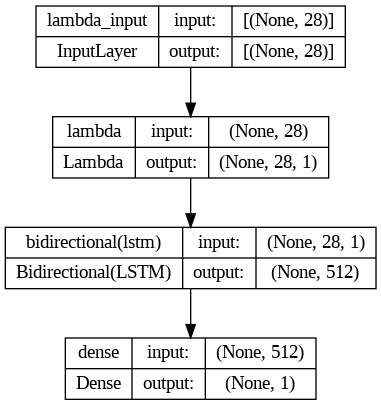

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_9, show_shapes=True, show_layer_names=True)


In [ ]:
kumpulan_train_windows["train_windows_1"].shape

(14035, 28)

## Mereview hyperparameter yang terpilih dari proses hyperparameter tuning

In [ ]:
!pip install keras-tuner


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from keras import Model
from keras.layers import Input, Dense, Bidirectional, LSTM, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from numpy import array
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch


In [ ]:

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# memuat ulang hyperparameter bidirectional LSTM dengan hyperparameter tuning

def model_bidirectional_LSTM_uni_builder(hp):

  tf.random.set_seed(42)
  model_9 = tf.keras.models.Sequential([
          #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
          tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), # ini lambda layer sumberny dari bangkit C4W3 lab1
                        input_shape=[WINDOW_SIZE]),

          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hp.Int('bi_lstm_n_units', min_value=32, max_value=256, step=32),
                                                             input_shape=(WINDOW_SIZE, 1),
                                                             return_sequences = False,
                                                             activation = "relu")),
          #tf.keras.layers.Dropout(0.2, seed=42),
          #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1)
          ], name = "model_9_bidirectionalLSTM_univariate")


  #compile model 2
  model_9.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_9

tuner mengenali model_LSTM_uni_builder dan mulai meload hyperparameter terbaik yang sudah dicari

In [ ]:
import keras_tuner as kt

tuner_bi_LSTM_uni = kt.Hyperband(model_bidirectional_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='D:\ImamSyabana\TugasAkhir\directForecasting\dist_7030_window28\dist_7030_window28/7030_tuning_logs',
                     project_name='bi_LSTM_univariate')

Reloading Tuner from D:\ImamSyabana\TugasAkhir\directForecasting\dist_7030_window28\dist_7030_window28/7030_tuning_logs\bi_LSTM_univariate\tuner0.json


## Proses tuning untuk meload hyperparameter saja tidak mencari ulang


In [ ]:
tuner_bi_LSTM_uni.search(kumpulan_train_windows["train_windows_1"], # train nikkei 225 windows dan labels adalah pasangan window dan labels untuk porsi data latih
                         kumpulan_train_horizons["train_horizons_1"], # yang horizonnya adalah target prediksi pada timesteps ke-1 setelah masing-masing windows
                         # Hal tersebut dipilih berasal dari proses sebelumnya saat mencari model terbaik yang menggunakan pasangan window dan horizon
                         # dimana horizon nya berupa target prediksi pada timesteps ke-1 setelah masing-masing window-nya
                         epochs=10,
                         validation_data=(kumpulan_test_windows["test_windows_1"], kumpulan_test_horizons["test_horizons_1"]),
                         batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_bi_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ["bi_lstm_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM univariate:
bi_lstm_n_units: 256
learning_rate: 0.01


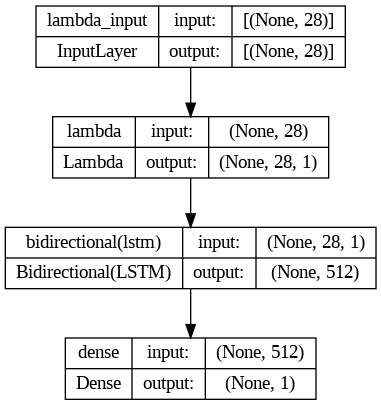

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_9, show_shapes=True, show_layer_names=True)


# Mengetes ulang model sebelum direct forecasting

pengetesan ulang menggunakan data tes 30% kebelakang dari februari 2024

In [ ]:
# membuat predicted value berdasarkan model terpilih dari proses sebelumnya yang sudah di train

model_9_preds = tf.squeeze(model_9.predict(kumpulan_test_windows["test_windows_1"]))
model_9_preds



188/188 [==============================] - 2s 10ms/step


<tf.Tensor: shape=(6015,), dtype=float32, numpy=
array([0.44241175, 0.45153266, 0.4535319 , ..., 0.9980467 , 0.9997746 ,
       0.99919134], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_9_preds = scaler_univariate.inverse_transform([model_9_preds]) #denormalisasi hasil prediksi
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([kumpulan_test_horizons["test_horizons_1"]]) #denormalisasi nilai aktual pada porsi test

In [ ]:
denormalized_model_9_preds = tf.squeeze(denormalized_model_9_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_9_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_9_preds)

model_9_results

{'mae': 165.32483,
 'mse': 53977.027,
 'rmse': 232.32956,
 'mape': 1.0620793,
 'R-square': 0.998770231391393}

# Fungsi plot loss untuk menyimpan loss setiap epoch masing masing iterasi

In [ ]:
def plot_loss_epoch(history, var_iter):
  iter_history = var_iter
  #-----------------------------------------------------------
  # berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
  #
  #-----------------------------------------------------------
  plt.figure(figsize = (10,7))
  loss = history.history[ 'loss' ]
  val_loss = history.history[ 'val_loss' ]
  epochs = range(len(loss)) #  keterangan jumlah epochs
  #------------------------------------------------
  # Visualisasikan training dan validation accuracy setiap epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
  plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
  plt.ylabel("loss & val_loss (mae)")
  plt.xlabel("epochs")
  plt.title ('Training dan Validation loss')
  plt.legend(loc=0)


  # Menyimpan plot loss dan val_loss menjadi file gambar
  path_save_fig = "D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_Revisi\gabung_dataAktual\intoFuture_model_loss_visualization\loss_bidirectional_LSTM_uni_iter{num_iter}.png".format(num_iter = iter_history)
  plt.savefig(path_save_fig)


  # Membuat DataFrame loss dan val_loss
  df_loss = pd.DataFrame({
      'Epoch': epochs,
      'Training Loss': loss,
      'Validation Loss': val_loss
  })

  # simpan visualisasi loss per epoch menjadi CSV file
  path_save_csv = "D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_Revisi\gabung_dataAktual\intoFuture_model_loss_value_per_epoch\loss_bidirectional_LSTM_uni_iter{num_iter}.csv".format(num_iter = iter_history)

  df_loss.to_csv(path_save_csv, index=False)


# Forecasting ke masa depan

Alright, let's create a function which returns INTO_FUTURE forecasted values using a trained model.

To do so, we'll build the following steps:



1.   Function which takes as input:


*   a list of values (the Bitcoin historical data)
*   a trained model (such as model_9)
* a window into the future to predict (our INTO_FUTURE variable)
* the window size a model was trained on (WINDOW_SIZE) - the model can only predict on the same kind of data it was trained on


2.   Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last WINDOW_SIZE values from the input values (predictions will start from the last WINDOW_SIZE values of the training data)
3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE datasets which update to remove the first the value and append the latest prediction



Eventually future predictions will be made using the model's own previous predictions as input

Karena forecasting bulan maret 2024 dengan direct Forecasting menggunakan data aktual maret 2024 setiap melakukan retrain model dan membuat prediksi, maka menginput data Nikkei 225 maret 2024 dahulu

# Import data time series nikkei225 maret 2024  aktual dengan pandas (Untuk mengevaluasi hasil prediksi direct forecasting bulan Maret 2024)

mendownload data harga saham Nikkei225 dengan interval harian pada maret 2024

In [ ]:
!wget https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/nikkei225/Nikkei225_daily_maret2024.csv

--2024-05-29 21:59:05--  https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/nikkei225/Nikkei225_daily_maret2024.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1246 (1.2K) [text/plain]
Saving to: ‘Nikkei225_daily_maret2024.csv’

Nikkei225_daily_mar 100%[===================>]   1.22K  --.-KB/s    in 0s      

2024-05-29 21:59:06 (6.48 MB/s) - ‘Nikkei225_daily_maret2024.csv’ saved [1246/1246]



In [ ]:
# import dengan pandas
import pandas as pd

# konversi format nilai
def convert_value(value):
    # Check if the value is not NaN and not '-'
    if value != '-':
        # Remove commas and convert to float
        return float(value.replace(',', ''))
    else:
        return None

# membaca data saham Nikkei225
nikkei225_maret2024_df = pd.read_csv("D:\ImamSyabana\TugasAkhir\directForecasting\dataset/Nikkei225_daily_maret2024.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"],
                           converters = {'Open': convert_value,
                                         'High': convert_value,
                                         'Low': convert_value,
                                         'Close': convert_value})
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

nikkei225_maret2024_df.tail()

,Open,High,Low,Close
Date,,,,
2024-03-25,40798.96,40837.18,40414.12,40414.12
2024-03-26,40345.04,40529.53,40280.85,40398.03
2024-03-27,40517.17,40979.36,40452.21,40762.73
2024-03-28,40324.42,40482.02,40054.06,40168.07
2024-03-29,40277.45,40521.71,40268.11,40369.44


In [ ]:
nikkei225_maret2024_close_df = pd.DataFrame(nikkei225_maret2024_df["Close"]).rename(columns={"Close": "Closing Price (Yen) (Nilai aktual)"})
nikkei225_maret2024_close_df.tail()


,Closing Price (Yen) (Nilai aktual)
Date,
2024-03-25,40414.12
2024-03-26,40398.03
2024-03-27,40762.73
2024-03-28,40168.07
2024-03-29,40369.44


In [ ]:
np.array(nikkei225_maret2024_close_df["Closing Price (Yen) (Nilai aktual)"])

array([39910.82, 40109.23, 40097.63, 40090.78, 39598.71, 39688.94,
       38820.49, 38797.51, 38695.97, 38807.38, 38707.64, 39740.44,
       40003.6 , 40815.66, 40888.43, 40414.12, 40398.03, 40762.73,
       40168.07, 40369.44])

# Fungsi make future forecast

In [ ]:
# membuat fungsi untuk membuat prediksi ke masa depan (testing langkah2 ke target maret 2024)
def make_forecast_direct_forecasting(window, horizon, model) -> list:
  """
  Membuat prediksi sebanyak jumlah timesteps into_future pada maret 2024

  Keluaran berupa hasil prediksi pada timesteps ke-1 sampai ke-20 pada bulan maret 2024
  setelah window terakhir yang berada pada bulan Februari 2024

  Parameter :
  window & horizon : adalah pasangan window dan horizon paling akhir yang akan di proses menjadi window baru yang akan
                      digunakan untuk memprediksi nilai pada horizon selanjutnya.

                      Maka dari itu window dan horizon yang dimasukkan adalah yang full
                      bukan dan horizonnya memprediksi pada target yang berada di satu timesteps
                      setelah masing-masing window
  """

  # Hyperparameter terbaik model bidirectional LSTM terpilih yang didapat dari proses
  # hyperparameter tuning pada tahap sebelumnya akan digunakan untuk seluruh 20 model yang dibuat

  # membuat empty list untuk future forecast dan data yang akan di forecast (last window)
  forecasted_value = []

  # membuat window yang berisi window terakhir tanpa value pertama dan ditambah dengan horizon terakhir
  window_to_predict = np.concatenate((np.squeeze(window[-1:][:, 1:]), (horizon[-1:]).flatten()))


  # membuat prediksi sejumlah INTO_FUTURE,

  future_pred = model.predict(np.expand_dims(window_to_predict, axis = 0))

  print(f"Memprediksi pada window:\n {window_to_predict} -> Menghasilkan : {future_pred}\n")

  # append hasil prediksi ke forecasted_value
  forecasted_value.append(future_pred.tolist())

  return forecasted_value








In [ ]:
kumpulan_windows["x_nikkei_1"].shape

(20050, 28)

In [ ]:
kumpulan_horizons["y_nikkei_1"].shape

(20050,)

# Buat loop

looping untuk memprediksi nilai saham bulan maret 2024

In [ ]:
kumpulan_test_horizons["test_horizons_1"]

array([0.4530995 , 0.45396939, 0.45479101, ..., 1.        , 0.99919575,
       0.99812715])

In [ ]:
len(kumpulan_train_windows["train_windows_20"])

14021

In [ ]:
len(kumpulan_train_horizons["train_horizons_20"])

14021



Jumlah train Windows (14035, 28)
Jumlah test Windows (6015, 28)
Jumlah train Labels (14035,)
Jumlah test Labels (6015,)


1/1 [==============================] - 0s 147ms/step
Memprediksi pada window:
 [0.91632458 0.93123177 0.9304814  0.92304696 0.92330211 0.91090499
 0.91795071 0.91894473 0.92458524 0.91755535 0.92129849 0.92630791
 0.92136592 0.92032542 0.93931083 0.94018277 0.96742245 0.96076545
 0.97237645 0.98078677 0.98035617 0.97762926 0.97503823 0.99640295
 0.99985161 1.         0.99919575 0.99812715] -> Menghasilkan : [[0.9981762]]





Epoch 1/50
110/110 [==============================] - ETA: 0s - loss: 0.0267
Epoch 1: loss improved from inf to 0.02666, saving model to D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_REVISI\gabung_dataAktual\intoFuture_model_best_epoch\model_9_bidirectionalLSTM_univariate_2
INFO:tensorflow:Assets written to: D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_REVISI\gabung_dataAktual\intoFuture_model_best_epoch\model

KeyError: 'train_windows_21'

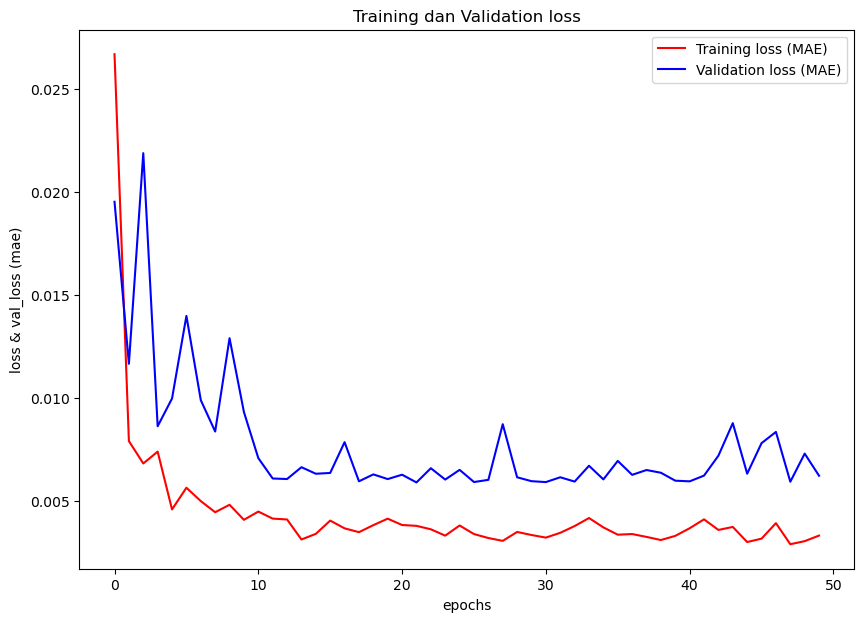

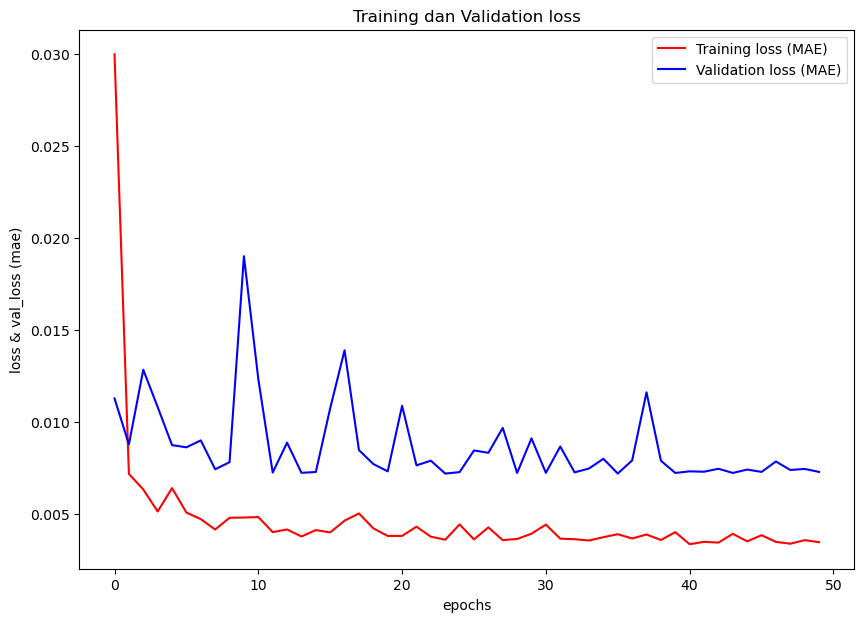

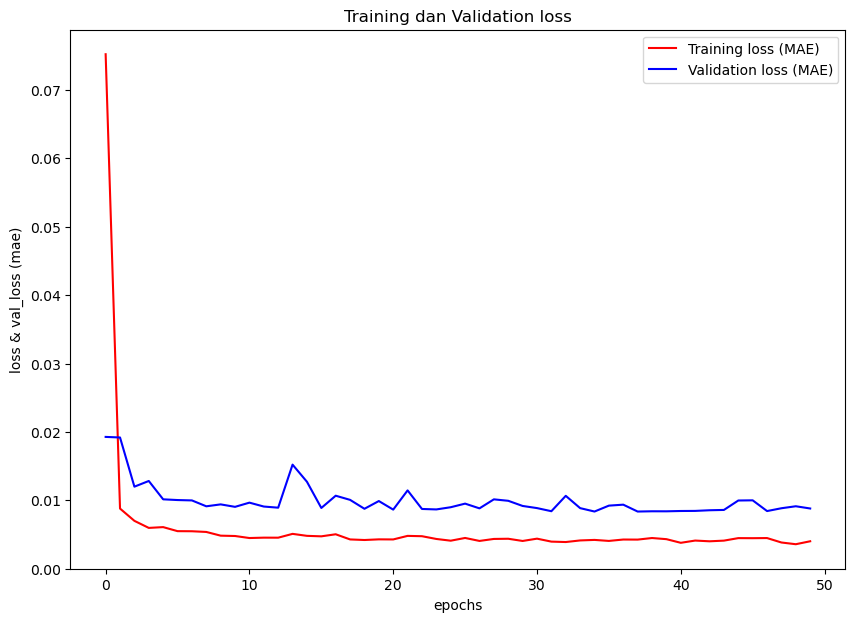

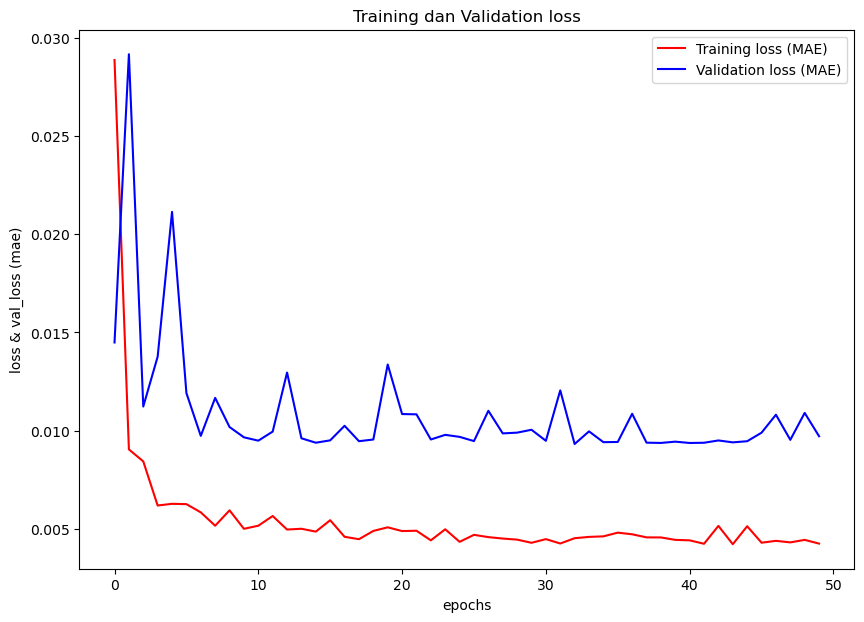

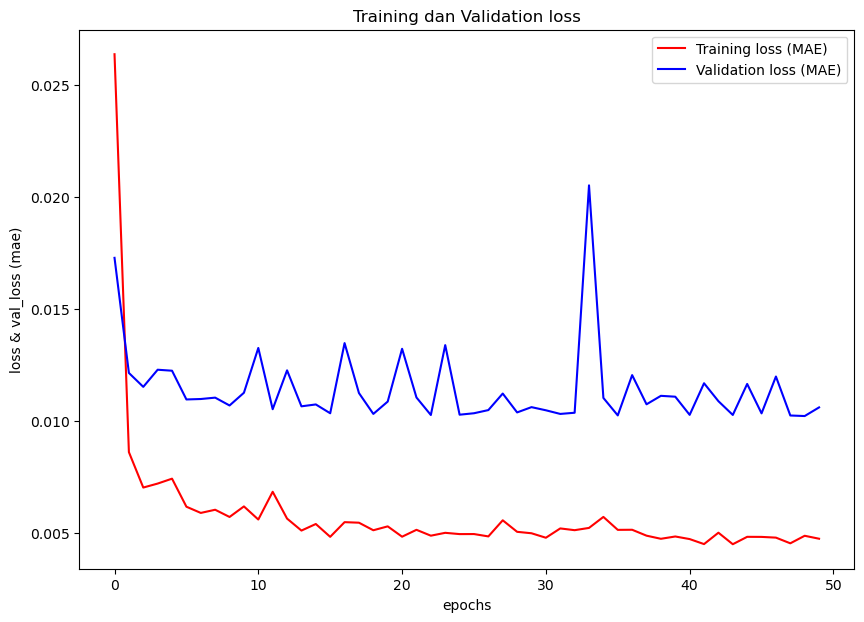

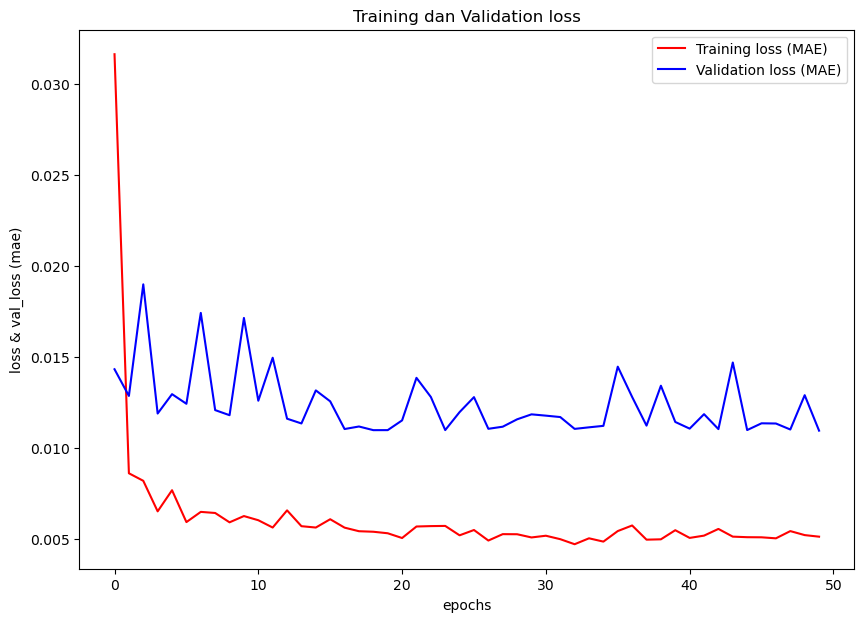

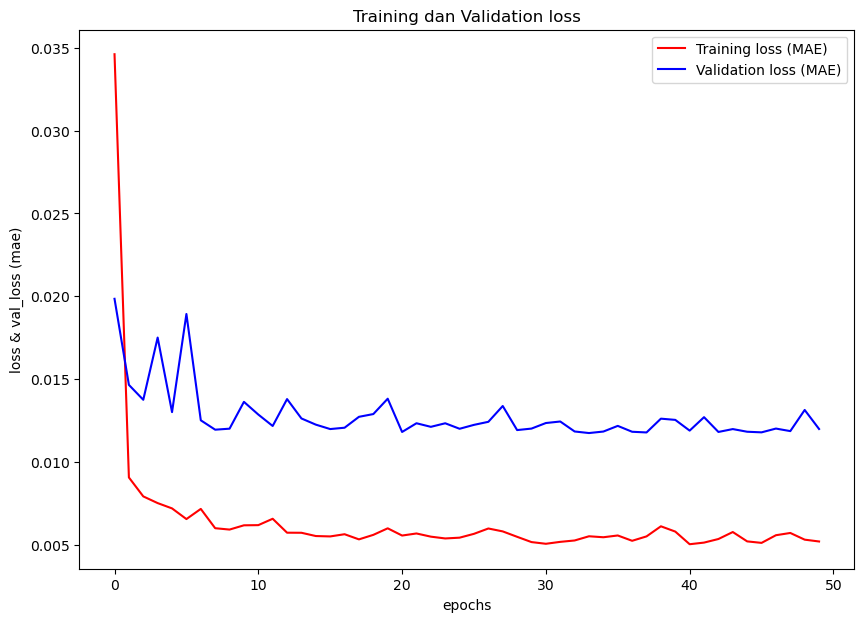

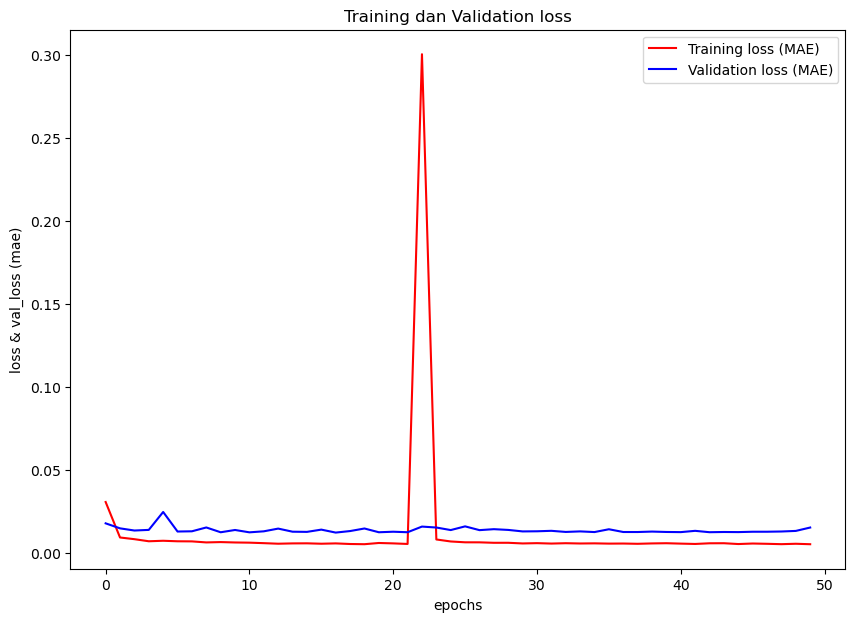

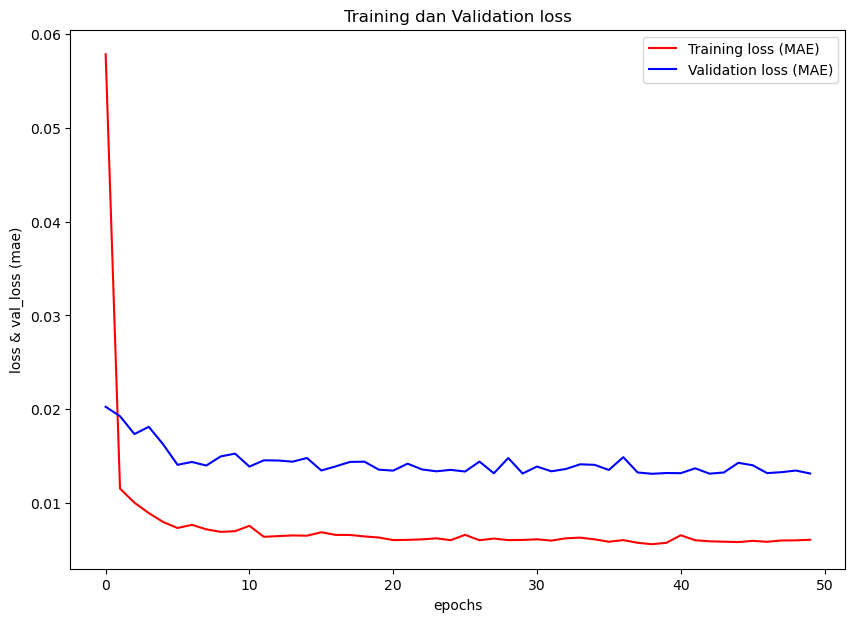

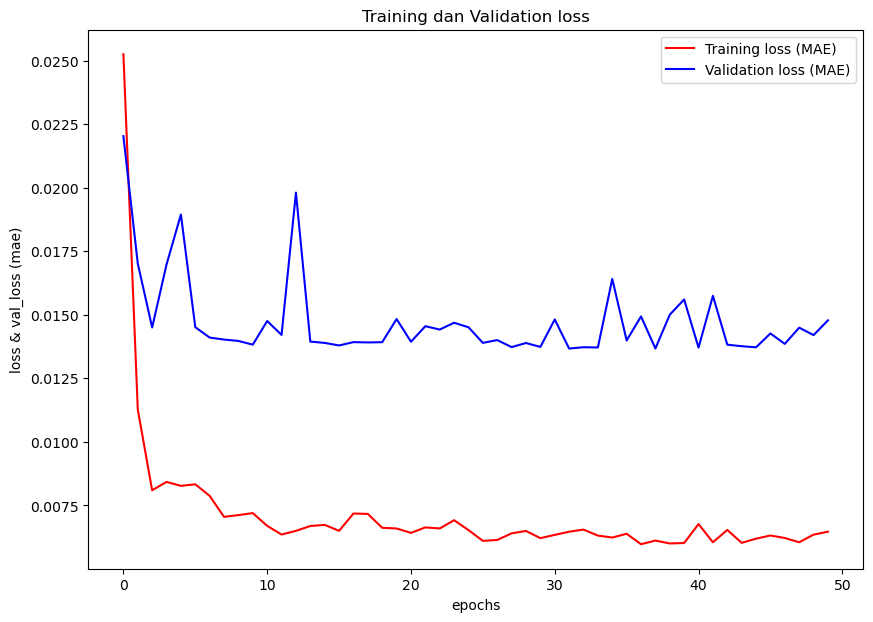

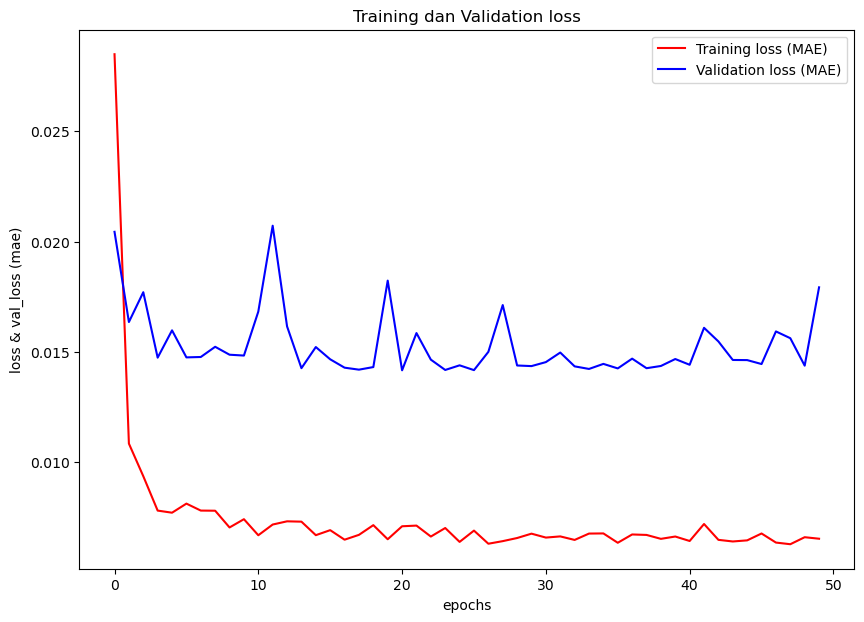

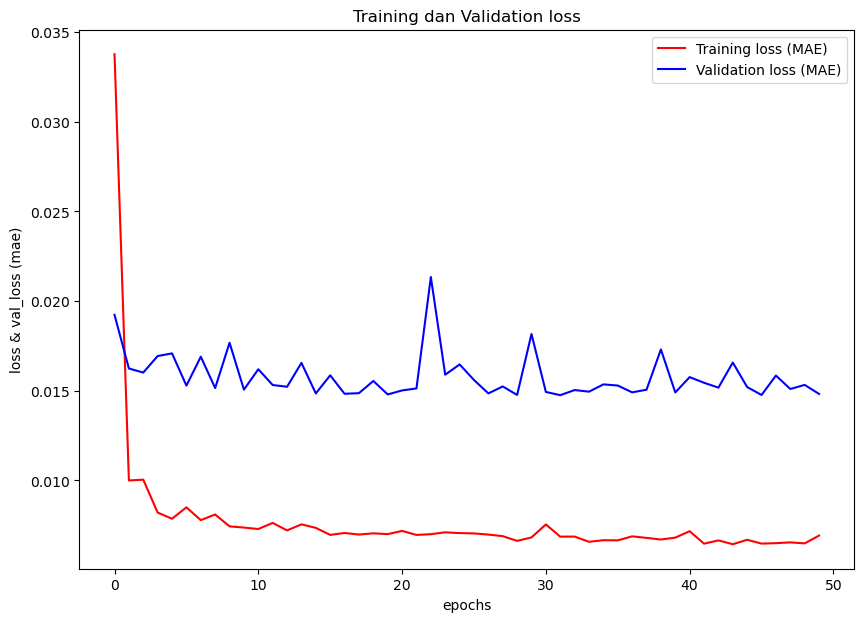

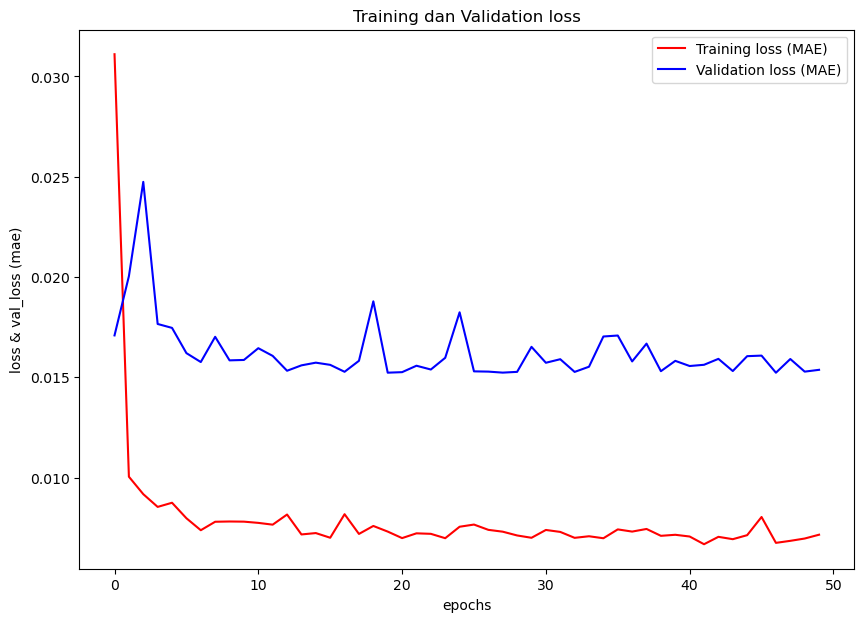

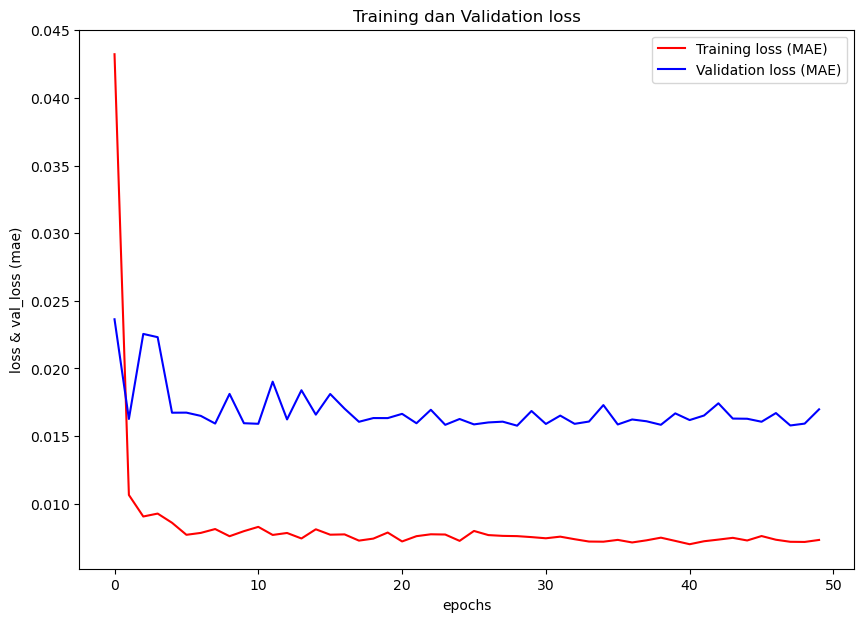

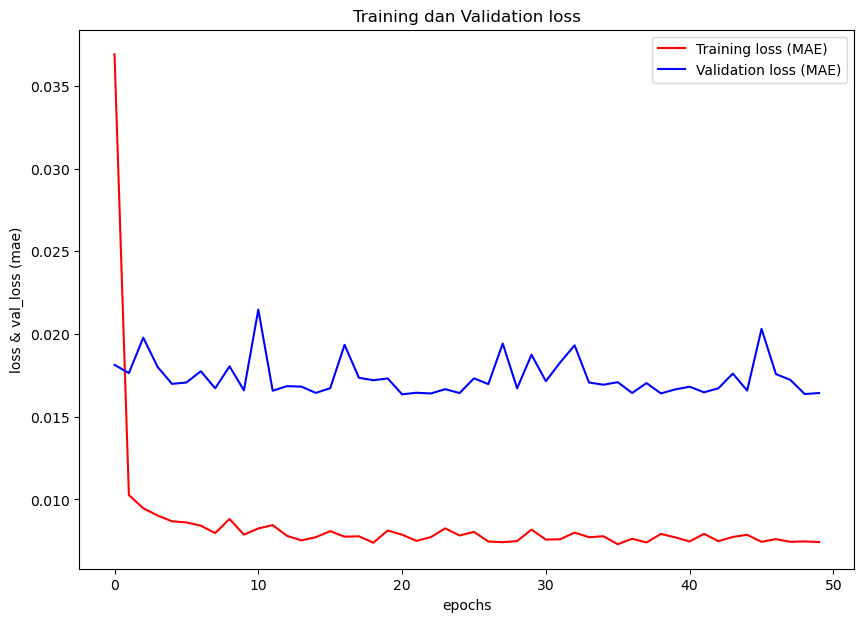

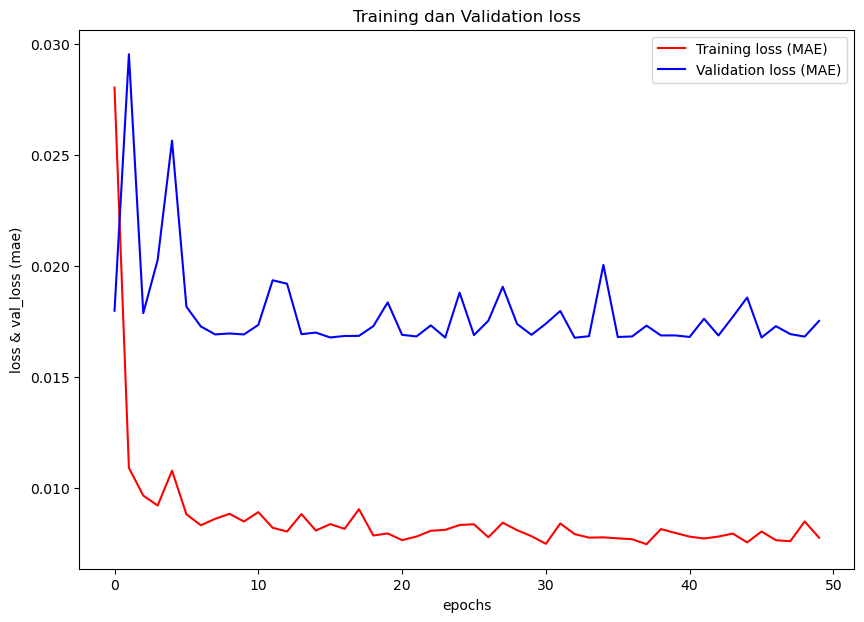

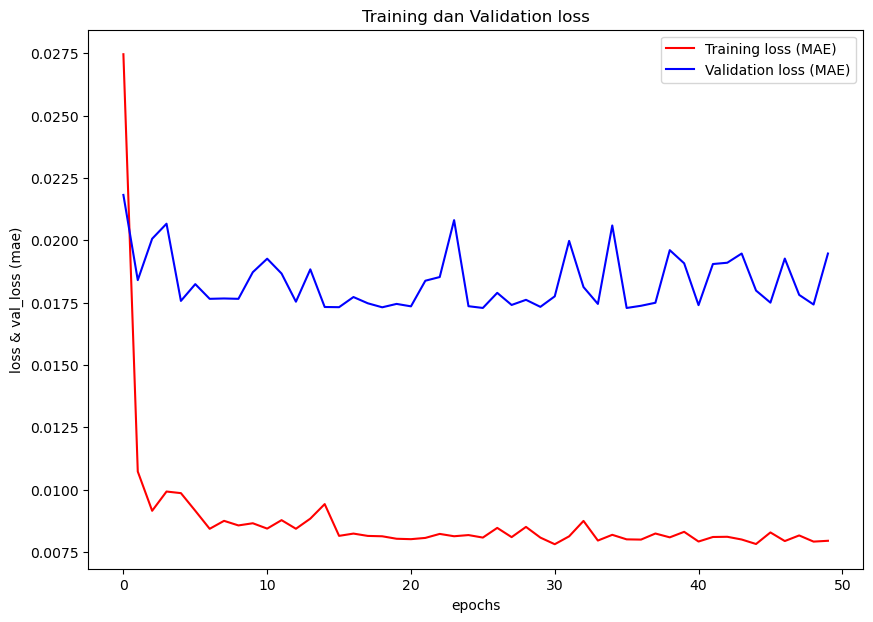

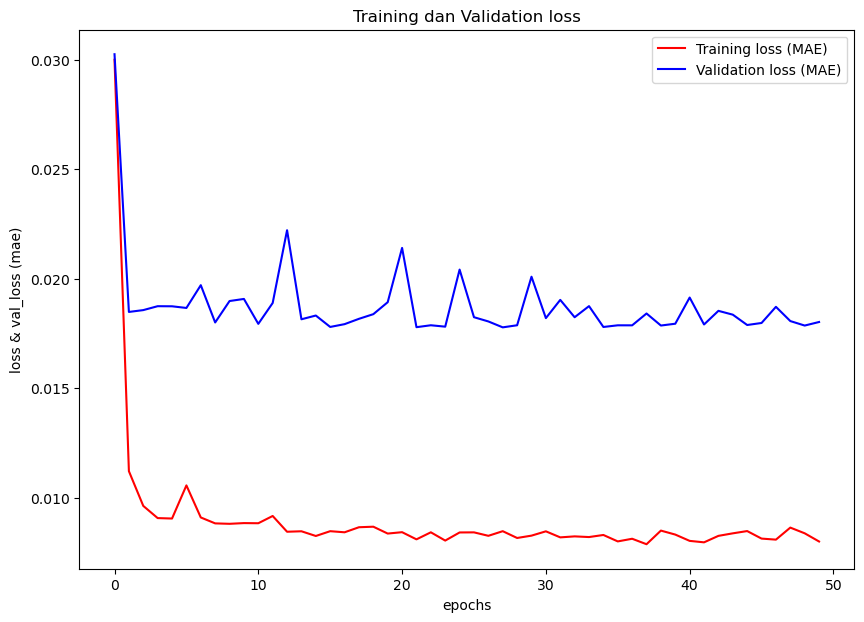

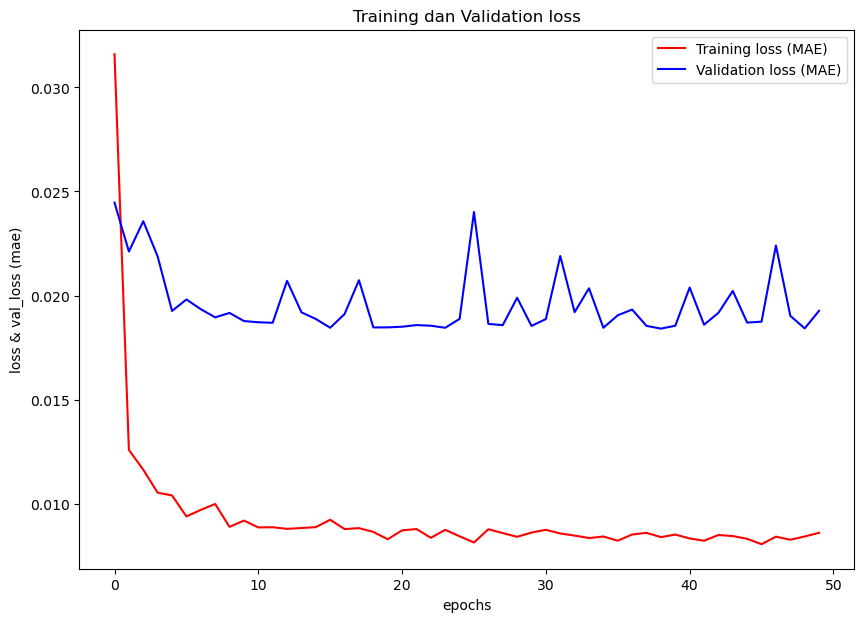

In [ ]:
import time

#load model 9 original pada awal run cell supaya iterasi pertama masih menggunakan model_9 original
# Iterasi pertama dapat menggunakan model original tahap sebelumnya karena model tersebut
# dilatih dengan target prediksi horizon yang berada di timesteps ke-1 setelah masing-masing prediksi
from tensorflow.keras.models import load_model

# Load saved model yang berisi model bidirectional LSTM tahap sebelumnya yang dilatih
# dengan target prediksi horizon yang berada di timesteps ke-1 setelah masing-masing prediksi
model_9 = tf.keras.models.load_model("D:\ImamSyabana\TugasAkhir\directForecasting\dist_7030_window28\dist_7030_window28/7030_saved_models\model_9_bidirectionalLSTM_univariate.h5", compile =False)

# Variabel untuk menyimpan hasil prediksi sepanjang maret 2024
prediksi_nikkei225_Maret2024 = []

# waktu mulai mencatat waktu
start_time = time.time()

# jlm timesteps sebanyak data yang harus diprediksi selama bulan Maret 2024
jml_time_steps = len(nikkei225_maret2024_close_df)

for i in range(jml_time_steps):
    print("\n")

    # memvisualisasikan jumlah train dan test setiap iterasi
    print("Jumlah train Windows",kumpulan_train_windows[f"train_windows_{i+1}"].shape)
    print("Jumlah test Windows", kumpulan_test_windows[f"test_windows_{i+1}"].shape)

    print("Jumlah train Labels",kumpulan_train_horizons[f"train_horizons_{i+1}"].shape)
    print("Jumlah test Labels", kumpulan_test_horizons[f"test_horizons_{i+1}"].shape)


    # menyimpan dataset train test setiap iterasi
    df_trainWindows = pd.DataFrame(kumpulan_train_windows[f"train_windows_{i+1}"])
    df_trainWindows.to_csv("D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_REVISI\gabung_dataAktual\intoFuture_dataset_per_iter/train_nikkeiWindows/train_nikkeiWindows_{iter}.csv".format(iter = i + 2))

    df_testWindows = pd.DataFrame(kumpulan_test_windows[f"test_windows_{i+1}"])
    df_testWindows.to_csv("D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_REVISI\gabung_dataAktual\intoFuture_dataset_per_iter/test_nikkeiWindows/test_nikkeiWindows_{iter}.csv".format(iter = i + 2))

    df_trainLabels = pd.DataFrame(kumpulan_train_horizons[f"train_horizons_{i+1}"])
    df_trainLabels.to_csv("D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_REVISI\gabung_dataAktual\intoFuture_dataset_per_iter/train_nikkeiLabels/train_nikkeiLabels_{iter}.csv".format(iter = i + 2))

    df_testLabels = pd.DataFrame(kumpulan_test_horizons[f"test_horizons_{i+1}"])
    df_testLabels.to_csv("D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_REVISI\gabung_dataAktual\intoFuture_dataset_per_iter/test_nikkeiLabels/test_nikkeiLabels_{iter}.csv".format(iter = i + 2))

    print("\n")

    prediksi_Maret2024 = make_forecast_direct_forecasting(window = kumpulan_windows["x_nikkei_1"],
                                           horizon = kumpulan_horizons["y_nikkei_1"],
                                           model = model_9,
                                           )

    # Menyimpan hasil nilai prediksi pada bulan Maret 2024
    prediksi_nikkei225_Maret2024.append(prediksi_Maret2024)

    # Mengimplementasikan best hyperparameter terbaik yang digunakan pada model yang dilaitih dengan keseluruhan data sampai hari terakhir 2023 saja
    model_9 = tuner_bi_LSTM_uni.hypermodel.build(best_hps)

    print("\n")
    print("\n")
    # Membuat model kembali yang dapat memprediksi horizon yang targetnya berada pada timesteps ke-2 sd ke-20 setelah masing-masing windows-nya
    history = model_9.fit(kumpulan_train_windows[f"train_windows_{i+2}"], #bagian ini nge retrain terus menerus diganti, make train test split jangan make yg fulls
            kumpulan_train_horizons[f"train_horizons_{i+2}"],
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (kumpulan_test_windows[f"test_windows_{i+2}"], kumpulan_test_horizons[f"test_horizons_{i+2}"]),
            callbacks = [create_model_checkpoint(model_name = model_9.name, num_iter =i + 2)])


    #memanggil fungsi untuk mendokumentasikan nilai loss
    plot_loss_epoch(history, i+2)

    # load model 9 pada best epoch yang loss mae paling kecil sepanjang training
    model_9 = tf.keras.models.load_model("D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_REVISI\gabung_dataAktual\intoFuture_model_best_epoch\model_9_bidirectionalLSTM_univariate_{num_iter}".format(num_iter = i + 2))

    # menyimpan model menjadi .h5 file
    from tensorflow.keras.models import save_model
    save_model(model_9, "D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_REVISI\gabung_dataAktual\intoFuture_saved_models\model_9_bidirectionalLSTM_univariate_{num_iter}.h5".format(num_iter = i + 2))

# waktu mencatat waktu training selesai
end_time = time.time()

# menghitung waktu dari mulai sampai selesai
training_time = end_time - start_time
print("Waktu Training:", training_time, "detik")

In [ ]:
kumpulan_horizons["y_nikkei_1"][20031:20035]

array([0.91755535, 0.92129849, 0.92630791, 0.92136592])

In [ ]:
len(kumpulan_windows["x_nikkei_1"]), len(kumpulan_horizons["y_nikkei_1"])

(20050, 20050)

In [ ]:
# Hasil prediksi pada bulan maret 2024 sebelum di normalisasi

print(np.squeeze(prediksi_nikkei225_Maret2024))

len(prediksi_nikkei225_Maret2024)

[0.99817622 1.00165892 0.99596614 0.99074346 1.00910258 1.00370443
 0.99704313 0.99598527 1.02247763 1.00007546 0.9960295  0.98652941
 0.99012262 0.99676538 0.98841268 1.01356971 0.9899407  0.99181324
 1.0153017  0.97373337]


20

🛠 Exercise: In terms of a forecasting model, what might another approach to our make_future_forecasts() function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.

So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.

As it is, the make_future_forecasts() function skips the retraining of a model part.

## Denormalisasi nilai output prediksi dan test_labels

list variabel



*   y_nikkei = berisi label atau horizon yang meliputi juga (20 terakhir) nilai saham aktual bulan maret 2024 (bentuk normalisasi)
*   np.array(nikkei225_maret2024_close_df["Closing Price (Yen) (Nilai aktual)"]) = adalah harga saham aktual sebenarnya pada maret 2024 (bukan bentuk normalisasi)
*   np.squeeze(prediksi_nikkei225_Maret2024) = hasil direct forecasting maret 2024 (bentuk normalisasi)
*   intoFuture_forcasted_value = hasil direct forecasting maret 2024 (yang sudah di reverse normalisasi atau denormalisasi)





In [ ]:
kumpulan_horizons["y_nikkei_1"].shape

(20050,)

In [ ]:
np.squeeze(kumpulan_horizons["y_nikkei_1"]).reshape(1, -1)

array([[4.20388377e-04, 5.05947372e-04, 5.61879969e-04, ...,
        1.00000000e+00, 9.99195745e-01, 9.98127152e-01]])

In [ ]:
#  harga saham aktual untuk 20 hari kerja di bulan Maret 2024

np.array(nikkei225_maret2024_close_df["Closing Price (Yen) (Nilai aktual)"])

array([39910.82, 40109.23, 40097.63, 40090.78, 39598.71, 39688.94,
       38820.49, 38797.51, 38695.97, 38807.38, 38707.64, 39740.44,
       40003.6 , 40815.66, 40888.43, 40414.12, 40398.03, 40762.73,
       40168.07, 40369.44])

In [ ]:
# nilai prediksi saham nikkei 225 hasil direct forecasting  pada bulan maret 2024 bentuk normalisasi

print(np.squeeze(prediksi_nikkei225_Maret2024))

[0.99817622 1.00165892 0.99596614 0.99074346 1.00910258 1.00370443
 0.99704313 0.99598527 1.02247763 1.00007546 0.9960295  0.98652941
 0.99012262 0.99676538 0.98841268 1.01356971 0.9899407  0.99181324
 1.0153017  0.97373337]


In [ ]:
intoFuture_forcasted_value = scaler_univariate.inverse_transform(np.squeeze(prediksi_nikkei225_Maret2024).reshape(1, -1))
intoFuture_forcasted_value = np.squeeze(intoFuture_forcasted_value)

intoFuture_forcasted_value # Hasil 20 step prediksi di bulan maret 2024 setelah di denormalized

array([39168.1111111 , 39304.47366351, 39081.57701764, 38877.08686588,
       39595.9249898 , 39384.56420045, 39123.74602259, 39082.32615985,
       40119.61506871, 39242.47456087, 39084.0578219 , 38712.08887759,
       38852.77825137, 39112.87062478, 38785.8268753 , 39770.83219248,
       38845.65556593, 38918.97348389, 39838.6470658 , 38211.06910219])

In [ ]:
nikkei225_maret2024_close_df.index

DatetimeIndex(['2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-08', '2024-03-11', '2024-03-12',
               '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-18',
               '2024-03-19', '2024-03-21', '2024-03-22', '2024-03-25',
               '2024-03-26', '2024-03-27', '2024-03-28', '2024-03-29'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
# membuat dataframe yang menggabungkan niai closing price nikkei225 bulan maret 2024 ke dalam dataframe
nikkei225_maret2024_close_df['Closing Price (Yen) (Nilai Prediksi)'] = intoFuture_forcasted_value

(nikkei225_maret2024_close_df)

,Closing Price (Yen) (Nilai aktual),Closing Price (Yen) (Nilai Prediksi)
Date,,
2024-03-01,39910.82,39168.111111
2024-03-04,40109.23,39304.473664
2024-03-05,40097.63,39081.577018
2024-03-06,40090.78,38877.086866
2024-03-07,39598.71,39595.924990
2024-03-08,39688.94,39384.564200
2024-03-11,38820.49,39123.746023
2024-03-12,38797.51,39082.326160
2024-03-13,38695.97,40119.615069


In [ ]:
# Menyimpan hasil prediksi direct Forecasting berdasarkan ACTUAL value
nikkei225_maret2024_close_df.to_csv('D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_REVISI\gabung_dataAktual\intoFuture_forecasted_value/aktual_VS_directForecasting.csv')

In [ ]:
# tinggal bikin viz prediksi bulan maret 2024
# bikin eval metrics preds sama actual maret 2024
# simpen hasil dalam csv

# Visualisasi hasil prediksi nilai saham 225 maret 2024

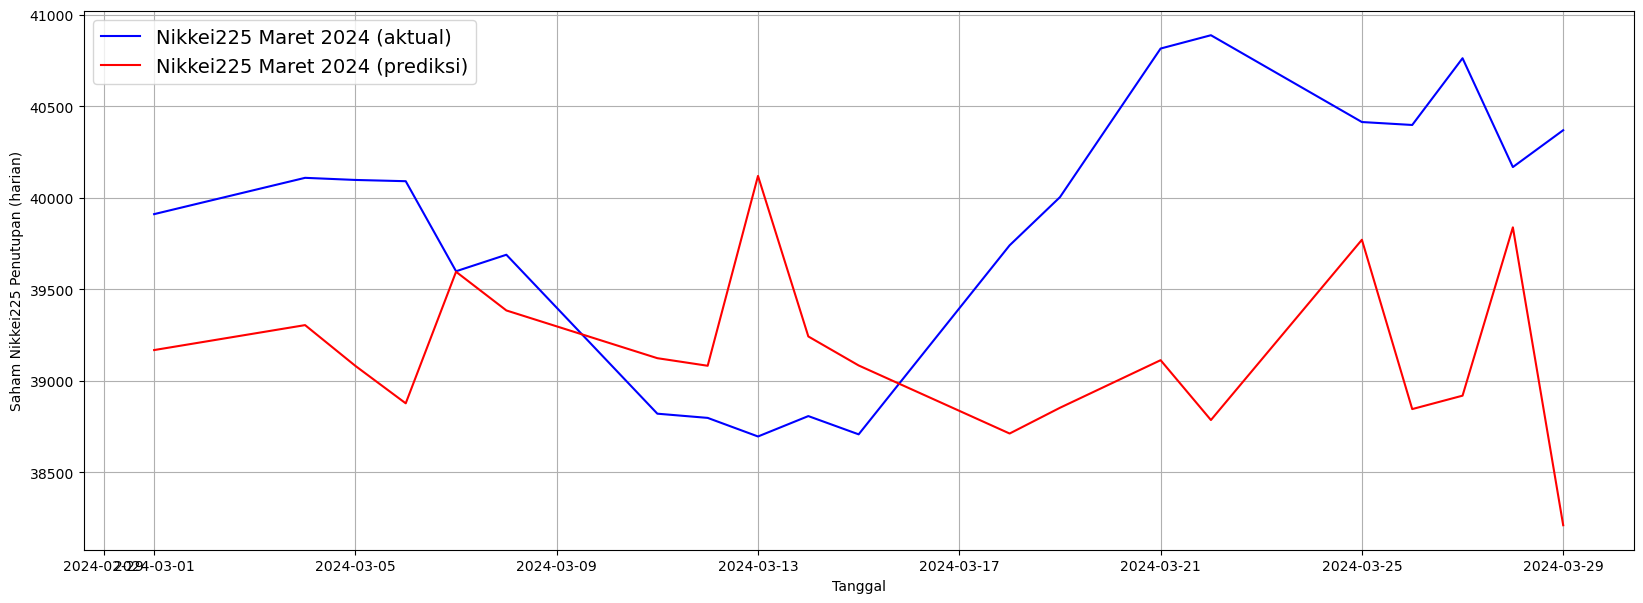

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_maret2024_close_df.index.tolist(), values = nikkei225_maret2024_close_df['Closing Price (Yen) (Nilai aktual)'].tolist(), format = "-", label = "Nikkei225 Maret 2024 (aktual)", color = 'b')
plot_time_series(timesteps = nikkei225_maret2024_close_df.index.tolist(), values = nikkei225_maret2024_close_df['Closing Price (Yen) (Nilai Prediksi)'].tolist(), format = "-", label = "Nikkei225 Maret 2024 (prediksi)", color = 'r')

# Save the plot to an image file
plt.savefig('D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_REVISI\gabung_dataAktual/visualisasi_directForecasting_dengan_dataAktual.png')

In [ ]:
(nikkei225_maret2024_close_df["Closing Price (Yen) (Nilai aktual)"].to_numpy())

array([39910.82, 40109.23, 40097.63, 40090.78, 39598.71, 39688.94,
       38820.49, 38797.51, 38695.97, 38807.38, 38707.64, 39740.44,
       40003.6 , 40815.66, 40888.43, 40414.12, 40398.03, 40762.73,
       40168.07, 40369.44])

In [ ]:
# mengukur predicted value time series saham saja dengan metrik evaluasi regresion problem

directForecasting_result = evaluate_preds(y_true = nikkei225_maret2024_close_df["Closing Price (Yen) (Nilai aktual)"].to_numpy(),
                                 y_pred = nikkei225_maret2024_close_df["Closing Price (Yen) (Nilai Prediksi)"].to_numpy())

directForecasting_result

{'mae': 970.96936,
 'mse': 1351035.8,
 'rmse': 1162.3406,
 'mape': 2.4196732,
 'R-square': -1.691533014877062}

In [ ]:
type(directForecasting_result)

dict

In [ ]:
# Menyimpan hasil evaluasi metrik maret 2024

header_row = directForecasting_result.keys()

with open('D:\ImamSyabana\TugasAkhir\directForecasting\directForecasting_REVISI\gabung_dataAktual/eval_metrik_maret2024.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(header_row)
  writer.writerow(directForecasting_result.values())